In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from datetime import datetime, timedelta

In [2]:
product_brand = pd.read_csv('./data/product_brand.csv', on_bad_lines='skip')
transaction = pd.read_csv('./data/transaction_new.csv')
customer = pd.read_csv('./data/customer.csv')
click_stream = pd.read_csv('./data/click_stream_book.csv')

# Product

In [3]:
# from tqdm import tqdm

# product = pd.read_csv('./data/product.csv', on_bad_lines='skip')
# product = product.assign(brand=np.nan)
# product = product.assign(productDisplayName=product['productDisplayName'].str.lower())

# for i in tqdm(range(product.shape[0])) : 
#     if pd.isna(product.iloc[i,:]['productDisplayName']) :
#         continue
#     elif 'boy' in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' boy')[0]
#     elif "girl" in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' girl')[0]
#     elif 'women' in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' women')[0]
#     elif 'men' in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' men')[0]
#     elif 'kid' in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' kid')[0]
#     elif 'unisex' in product.iloc[i,:]['productDisplayName'] : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' unisex')[0]
#     else : 
#         product.loc[product.index==i, 'brand'] = product.iloc[i,:]['productDisplayName'].split(' ')[0]

In [4]:
# brand_product = product[~product['brand'].isnull()]
# nobrand_product = product[product['brand'].isnull()]

In [5]:
# rename_brand_list = ['playboy','nike','gini','arrow','peter england','adidas','reebok',
#                      'doodle','q&q','united colors of benetton','timberland','marvel',
#                      'puma','casio','palm tree','wrangler','u.s.polo', 'madagascar', 
#                      'jealous 21', 'warner bros', 'crocs', 'tonino lamborghini', 
#                      'allen', 'wildcraft', 'kiara', 'chhota bheem', 'disney', 'david beckham',
#                      'kalenji ekiden', 'red tape']

In [6]:
# for brand in rename_brand_list : 
#     brand_product.loc[brand_product['brand'].str.startswith(brand), 'brand'] = brand

In [7]:
# brand_product.loc[brand_product['brand'].str.startswith('u.s.'), 'brand'] = 'u.s. polo assn.'
# brand_product.loc[brand_product['brand'].str.startswith('gini'), 'brand'] = 'gini and jony'
# brand_product.loc[brand_product['brand'].str.startswith('reid'), 'brand'] = 'reid & taylor'
# brand_product.loc[brand_product['brand'].str.startswith('jealous'), 'brand'] = 'jealous 21'
# brand_product.loc[brand_product['brand'].str.startswith('maxima'), 'brand'] = 'maxima'
# brand_product.loc[brand_product['brand'].str.startswith('mr.'), 'brand'] = 'mr.men'
# brand_product.loc[brand_product['brand'].str.startswith('turtle'), 'brand'] = 'turtle check'

# brand_product.loc[brand_product['brand'].str.contains('benetton'), 'brand'] = 'united colors of benetton'
# brand_product.loc[(brand_product['brand'].str.contains('levis'))|(brand_product['brand'].str.contains("levi's")), 'brand'] = "levi's"

In [8]:
# product_brand = pd.concat([brand_product, nobrand_product], axis=0).reset_index(drop=True)
# product_brand.to_csv('./data/product_brand.csv', index=False)

In [9]:
product_price = pd.merge(product_brand, transaction[['product_id', 'item_price']], how='left', left_on='id', right_on='product_id')
product_price = product_price.drop('product_id', axis=1)
product_price

# 같은 상품도 가격이 바뀐다. 

id gender masterCategory subCategory            articleType  \
0        15970    Men        Apparel     Topwear                 Shirts   
1        15970    Men        Apparel     Topwear                 Shirts   
2        15970    Men        Apparel     Topwear                 Shirts   
3        15970    Men        Apparel     Topwear                 Shirts   
4        15970    Men        Apparel     Topwear                 Shirts   
...        ...    ...            ...         ...                    ...   
1253961  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253962  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253963  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253964  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253965  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   

        baseColour  season    year   usage                productDisplayName  \
0        Navy Blue    Fall  2011.0  Casual  turtle check men navy blue shirt   
1        Navy Blue    Fall  2011.0  Casual  turtle check men navy blue shirt   
2        Navy Blue    Fall  2011.0  Casual  turtle check men navy blue shirt   
3        Navy Blue    Fall  2011.0  Casual  turtle check men navy blue shirt   
4        Navy Blue    Fall  2011.0  Casual  turtle check men navy blue shirt   
...            ...     ...     ...     ...                               ...   
1253961        NaN  Spring  2017.0     NaN                               NaN   
1253962        NaN  Spring  2017.0     NaN                               NaN   
1253963        NaN  Spring  2017.0     NaN                               NaN   
1253964        NaN  Spring  2017.0     NaN                               NaN   
1253965        NaN  Spring  2017.0     NaN                               NaN   

                brand  item_price  
0        turtle check      172361  
1        turtle check      256822  
2        turtle check      680544  
3        turtle check      560092  
4        turtle check      135930  
...               ...         ...  
1253961           NaN      421974  
1253962           NaN      207954  
1253963           NaN      343421  
1253964           NaN      219770  
1253965           NaN      369771  

[1253966 rows x 12 columns]

In [10]:
transaction[transaction['product_id']==15970].sort_values('created_at')
# 가격이 왤케 오르락 내리락하는지 모르겠음

created_at  customer_id  \
657637   2017-05-30T20:52:28.375138Z        91166   
467722   2017-12-01T01:27:26.150117Z        86922   
999688   2018-01-30T04:49:06.105304Z        54589   
862680   2018-08-12T02:14:17.383012Z        46562   
1863     2019-07-04T09:43:04.691523Z        58112   
716320   2019-12-18T09:41:27.669527Z        33833   
924320   2020-02-24T14:23:52.811407Z        54497   
681801   2020-04-04T19:38:39.648053Z        49056   
1080420  2020-07-05T18:04:59.094909Z        90370   
65316    2020-07-06T01:05:31.917477Z        59815   
556010   2020-08-20T13:34:57.459506Z         4325   
888823   2021-01-02T18:41:45.300074Z        85521   
1241196  2021-03-13T19:45:31.820451Z        97179   
857220   2021-04-12T19:34:09.508011Z        33495   
1002518  2021-05-02T17:04:58.960025Z        92988   
755676   2021-05-18T06:57:48.291376Z        12973   
821789   2021-06-24T01:25:48.615491Z        11396   
82248    2021-07-19T19:08:21.678312Z        85744   
747698   2021-09-12T01:03:50.841218Z         1897   
703879   2021-10-06T21:58:49.727451Z        34806   
61084    2021-10-18T02:42:44.802978Z        71232   
455750   2021-11-25T23:15:34.336246Z        76078   
463800   2021-12-12T06:14:02.102889Z        76748   
1063753  2021-12-24T03:48:19.329807Z        49477   
1243285  2021-12-31T19:41:08.898219Z        95914   
540651   2022-01-23T23:20:39.993346Z        71452   
592707   2022-01-26T21:20:18.961185Z        96133   
1115917  2022-03-03T21:09:20.593423Z        18479   
134820   2022-05-25T04:44:49.224091Z        75395   
905193   2022-06-19T04:11:29.021499Z        22656   
850544   2022-06-22T14:52:20.602096Z        70484   

                                   booking_id  \
657637   912ca646-a2ed-4d9f-bfcd-87eb359f68e1   
467722   16ba0118-b387-4bda-8d0d-599453176e87   
999688   3315a839-85d7-49a8-accb-5b9fa007c04f   
862680   106e0246-0c8c-4f02-9dd6-97c8215be33b   
1863     5af40e2d-34cb-4180-b570-aacb7ae5f06a   
716320   8a188b04-36bc-4331-b0e0-8e474f6bc0b6   
924320   33d90245-6863-4f89-be45-2211b296615d   
681801   a0219f43-0c43-4cf1-b414-edc227f209af   
1080420  85f1303c-d085-4229-979e-6c4afd819d35   
65316    9b40b96a-3bbd-4162-97d4-ac15c66a2496   
556010   d7d80db3-d3a3-4ced-96ba-0c15edbdf8e0   
888823   db57b4c8-575b-4fce-8d7f-bf88114ecee3   
1241196  6d4014b8-57ac-44c5-b770-11900f33c350   
857220   28dae75c-268c-4a4d-9316-e864b7575d25   
1002518  bb17b71e-965c-418c-9573-9eb6e734d839   
755676   23676276-b64c-47f9-adad-9a7a6d383992   
821789   542846f5-ad49-41d6-a345-65fbf26b4d48   
82248    c9fe45d3-0918-4aeb-b4bb-f63dee829620   
747698   786b6723-6172-4326-8f45-7bf2586b5122   
703879   21f26392-17fe-45e8-9320-70edd359611e   
61084    8723e324-1530-484e-88b6-a9d85f8dd13b   
455750   5d086919-6354-47cb-9807-393c94aa5f0e   
463800   a3b31024-91e5-4cd9-854b-255f51f1cba1   
1063753  8654d957-6936-4f6a-95f3-c850803290d4   
1243285  a8443f6c-42ab-4889-a668-801ea8b42222   
540651   b27f745e-b8f7-404c-b5fb-6e5f590d4546   
592707   9645cfc2-b028-42f8-abf8-0296c5e3df71   
1115917  5552c161-7ee2-40cb-9bf0-48008060c717   
134820   78508475-048e-40aa-afbf-57f7fdb8c6e3   
905193   6c44b2f1-7fb9-4d6a-a00e-c24afa856bd0   
850544   e07e4451-f01d-4de2-bcc4-7b00353fd74c   

                                   session_id payment_method payment_status  \
657637   67ea1675-e4aa-48b6-9395-fc1cb9094b68            OVO        Success   
467722   68a2e255-b12c-4963-a589-51f3aea20e55            OVO        Success   
999688   70c38821-65ea-40ea-958d-4a315a634c80            OVO        Success   
862680   d6dfcb1e-f45c-49d4-9617-b99be5c3d7ae            OVO        Success   
1863     2574a34f-2ac3-41f1-9145-a558f2901dd2     Debit Card        Success   
716320   2db0abd5-45d4-4aab-8e9c-2cce16292ad5        LinkAja        Success   
924320   1b7089dc-f718-42d5-bb2b-58712a639d05          Gopay        Success   
681801   7f778339-055c-4198-b7c1-eab4c5e94e55          Gopay        Success   
1080420  0806fe9f-3475-4a96-a991-c3bb6e85cf30    

In [11]:
product_price[product_price['item_price'].isnull()] # 모든 상품이 적어도 한 번은 팔린 적이 있음

Empty DataFrame
Columns: [id, gender, masterCategory, subCategory, articleType, baseColour, season, year, usage, productDisplayName, brand, item_price]
Index: []

In [12]:
# 상품별 평균가격 산출

avg_product_price = product_price.groupby('id')['item_price'].mean().round().reset_index()
avg_product_price = avg_product_price.rename(columns={'item_price':'avg_item_price'})
avg_product_price = avg_product_price.assign(avg_item_price=avg_product_price['avg_item_price'].astype(int))
avg_product_price

id  avg_item_price
0       1163          248495
1       1164          245078
2       1165          249508
3       1525          269842
4       1526          250363
...      ...             ...
44419  59995          266591
44420  59996          261104
44421  59998          245314
44422  59999          210652
44423  60000          260946

[44424 rows x 2 columns]

In [13]:
# 평균가격으로 대체 후 중복 제거 -> 제품 당 평균가격만 남음

product_price = product_price.merge(avg_product_price, how='left')
product_price = product_price.drop('item_price', axis=1)
product_price = product_price.drop_duplicates()
product_price

id gender masterCategory subCategory            articleType  \
0        15970    Men        Apparel     Topwear                 Shirts   
31       39386    Men        Apparel  Bottomwear                  Jeans   
57       59263  Women    Accessories     Watches                Watches   
89       21379    Men        Apparel  Bottomwear            Track Pants   
118      53759    Men        Apparel     Topwear                Tshirts   
...        ...    ...            ...         ...                    ...   
1253839  45687    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253864  42863  Women    Accessories        Bags               Clutches   
1253888  45698  Women  Personal Care   Fragrance  Perfume and Body Mist   
1253903  30992    Men  Personal Care   Fragrance  Perfume and Body Mist   
1253935  43119    Men  Personal Care   Fragrance  Perfume and Body Mist   

        baseColour  season    year   usage  \
0        Navy Blue    Fall  2011.0  Casual   
31            Blue  Summer  2012.0  Casual   
57          Silver  Winter  2016.0  Casual   
89           Black    Fall  2011.0  Casual   
118           Grey  Summer  2012.0  Casual   
...            ...     ...     ...     ...   
1253839        NaN  Spring  2017.0     NaN   
1253864      Brown  Summer  2012.0  Casual   
1253888        NaN  Spring  2017.0     NaN   
1253903        NaN  Spring  2017.0     NaN   
1253935        NaN  Spring  2017.0     NaN   

                                    productDisplayName              brand  \
0                     turtle check men navy blue shirt       turtle check   
31                  peter england men party blue jeans      peter england   
57                            titan women silver watch              titan   
89       manchester united men solid black track pants  manchester united   
118                              puma men grey t-shirt               puma   
...                                                ...                ...   
1253839                                            NaN                NaN   
1253864                                            NaN                NaN   
1253888                                            NaN                NaN   
1253903                                            NaN                NaN   
1253935                                            NaN                NaN   

         avg_item_price  
0                270158  
31               246739  
57               247712  
89               228423  
118              227161  
...                 ...  
1253839          221176  
1253864          251680  
1253888          208165  
1253903          237292  
1253935          269730  

[44424 rows x 12 columns]

In [14]:
# 혹시 연도별 물가상승이 영향이 있었을까? 했는데 그렇지도 않은 것 같음

product_price.groupby('year')['avg_item_price'].mean().sort_index()

year
2007.0    233798.000000
2008.0    250737.857143
2009.0    252109.000000
2010.0    250922.913712
2011.0    249686.615784
2012.0    250174.640533
2013.0    250033.299505
2014.0    249511.122881
2015.0    249885.733813
2016.0    250272.937396
2017.0    249176.804184
2018.0    250771.153086
2019.0    256852.696970
Name: avg_item_price, dtype: float64

In [15]:
masterCategory_counts = product_price.value_counts('masterCategory')
masterCategory_avg_price = product_price.groupby('masterCategory')['avg_item_price'].mean()
pd.concat([masterCategory_counts, masterCategory_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
masterCategory                        
Apparel          21397   249886.369304
Accessories      11274   250104.555260
Footwear          9219   250221.771667
Personal Care     2403   249283.070329
Free Items         105   248078.190476
Sporting Goods      25   243892.160000
Home                 1   268411.000000

In [16]:
subCategory_counts = product_price.value_counts('subCategory')
subCategory_avg_price = product_price.groupby('subCategory')['avg_item_price'].mean()
pd.concat([subCategory_counts, subCategory_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
subCategory                                     
Topwear                    15402   249885.136151
Shoes                       7343   250183.158382
Bags                        3055   249975.537152
Bottomwear                  2694   250009.209354
Watches                     2542   250414.112510
Innerwear                   1808   249842.100664
Jewellery                   1079   249748.333642
Eyewear                     1073   249786.499534
Fragrance                   1011   248478.804154
Sandal                       963   250393.938733
Wallets                      933   250294.585209
Flip Flops                   913   250350.731654
Belts                        811   250899.536375
Socks                        698   249607.146132
Lips                         527   250554.459203
Dress                        478   249330.979079
Loungewear and Nightwear     470   249877.619149
Saree                        427   249737.826698
Nails                        329   247875.531915
Makeup                       307   249162.517915
Headwear                     293   249566.911263
Ties                         258   249886.941860
Accessories                  129   254531.806202
Scarves                      118   252547.288136
Cufflinks                    108   249618.212963
Apparel Set                  106   250953.094340
Free Gifts                   104   248170.442308
Stoles                        90   246351.233333
Skin Care                     77   251886.727273
Skin                          69   252021.855072
Eyes                          43   249071.488372
Mufflers                      38   245734.868421
Shoe Accessories              24   247876.416667
Sports Equipment              21   241290.238095
Gloves                        20   240103.250000
Hair                          19   252323.000000
Bath and Body                 12   267971.000000
Water Bottle                   7   243296.428571
Perfumes                       6   239845.833333
Umbrellas                      6   268946.500000
Beauty Accessories             4   252660.750000
Wristbands                     4   257552.250000
Sports Accessories             3   239110.666667
Vouchers                       1   238484.000000
Home Furnishing                1   268411.000000

In [17]:
season_counts = product_price.value_counts('season')
season_avg_price = product_price.groupby('season')['avg_item_price'].mean()
pd.concat([season_counts, season_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
season                        
Summer   21472   250056.571861
Fall     11431   249656.547809
Winter    8517   250359.357168
Spring    2983   249455.513242

In [18]:
gender_counts = product_price.value_counts('gender')
gender_avg_price = product_price.groupby('gender')['avg_item_price'].mean()
pd.concat([gender_counts, gender_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
gender                        
Men      22147   250141.726645
Women    18631   249930.254307
Unisex    2161   249162.064785
Boys       830   249445.574699
Girls      655   248724.609160

In [19]:
articleType_counts = product_price.value_counts('articleType')
articleType_avg_price = product_price.groupby('articleType')['avg_item_price'].mean()
pd.concat([articleType_counts, articleType_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
articleType                                
Tshirts                7067   250021.262771
Shirts                 3217   249766.940628
Casual Shoes           2845   250521.269596
Watches                2542   250414.112510
Sports Shoes           2036   249952.849214
...                     ...             ...
Ipad                      1   238484.000000
Cushion Covers            1   268411.000000
Body Wash and Scrub       1   239377.000000
Shoe Laces                1   234769.000000
Suits                     1   229372.000000

[143 rows x 2 columns]

In [20]:
usage_counts = product_price.value_counts('usage')
usage_avg_price = product_price.groupby('usage')['avg_item_price'].mean()
pd.concat([usage_counts, usage_avg_price], axis=1).rename(columns={0:'counts'})

counts  avg_item_price
usage                               
Casual         34406   249880.121084
Sports          4025   250315.271056
Ethnic          3208   250401.610037
Formal          2345   249947.724520
Smart Casual      67   253902.537313
Party             29   248575.586207
Travel            26   245238.769231
Home               1   268411.000000

# Customer Gender, Sex

In [21]:
customer = customer.assign(first_join_date=pd.to_datetime(customer['first_join_date']))
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  object        
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

## Age

In [22]:
customer = customer.assign(birthdate=pd.to_datetime(customer['birthdate']))
customer = customer.assign(age=2022-customer['birthdate'].dt.year)
customer

In [24]:
customer['gender'].value_counts()

F    64230
M    35770
Name: gender, dtype: int64

In [25]:
customer['age'].describe()

count    100000.000000
mean         26.516130
std           7.275733
min           6.000000
25%          21.000000
50%          26.000000
75%          31.000000
max          68.000000
Name: age, dtype: float64

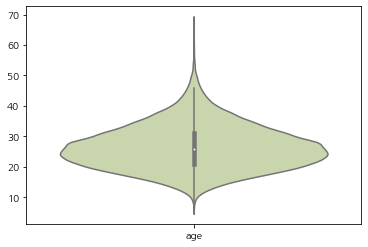

In [26]:
sns.violinplot(customer['age'], color='#CCDCA6')
plt.xticks([0], ['age'])
plt.show()

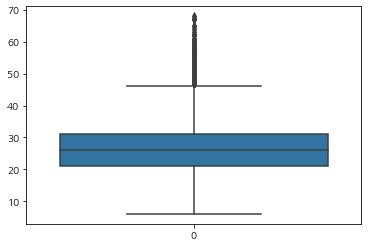

In [27]:
sns.boxplot(customer['age'])
plt.show()

In [29]:
click_stream = click_stream.assign(event_time=pd.to_datetime(click_stream['event_time']))
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463004 entries, 0 to 12463003
Data columns (total 12 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 1.1+ GB


In [30]:
click_stream

session_id   event_name  \
0         00001f29-3ede-4445-95f0-0178934e32ba     HOMEPAGE   
1         00001f29-3ede-4445-95f0-0178934e32ba  ADD_TO_CART   
2         00001f29-3ede-4445-95f0-0178934e32ba     HOMEPAGE   
3         00001f29-3ede-4445-95f0-0178934e32ba        CLICK   
4         00001f29-3ede-4445-95f0-0178934e32ba        CLICK   
...                                        ...          ...   
12462999  fffffaf6-55ee-428b-a3bf-075cd7f1a093  ITEM_DETAIL   
12463000  fffffaf6-55ee-428b-a3bf-075cd7f1a093  ITEM_DETAIL   
12463001  fffffaf6-55ee-428b-a3bf-075cd7f1a093  ITEM_DETAIL   
12463002  fffffaf6-55ee-428b-a3bf-075cd7f1a093   PROMO_PAGE   
12463003  fffffaf6-55ee-428b-a3bf-075cd7f1a093        CLICK   

                               event_time  \
0        2019-05-17 11:51:52.276396+00:00   
1        2019-05-17 19:54:53.276396+00:00   
2        2019-05-17 19:55:12.276396+00:00   
3        2019-05-18 03:58:25.276396+00:00   
4        2019-05-18 12:02:44.276396+00:00   
...                                   ...   
12462999 2018-08-20 13:46:27.790374+00:00   
12463000 2018-08-22 09:00:29.790374+00:00   
12463001 2018-08-24 04:20:30.790374+00:00   
12463002 2018-08-25 23:35:58.790374+00:00   
12463003 2018-08-27 18:51:50.790374+00:00   

                                      event_id traffic_source  product_id  \
0         51793173-664c-4557-8a06-fc37587bea3d         MOBILE         NaN   
1         517b331c-4296-4772-a1a2-9bf7500a5570         MOBILE     33855.0   
2         2c0581d2-3185-4172-87ea-795ee26a4d0a         MOBILE         NaN   
3         81982a1d-5562-44e8-8b1d-1c3366434c5e         MOBILE         NaN   
4         6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7         MOBILE         NaN   
...                                        ...            ...         ...   
12462999  0f3593ec-5341-4cee-b119-79dfd266911a         MOBILE         NaN   
12463000  24415771-d466-41a1-8cfb-aa6dc8f6cb40         MOBILE         NaN   
12463001  d52f1455-633d-448b-a704-c68ac1bd8156         MOBILE         NaN   
12463002  7689a2ca-e91e-4f79-97ae-f702c153ed6b         MOBILE         NaN   
12463003  37eb4f78-92aa-4114-9e9c-7590a868c809         MOBILE         NaN   

          quantity  item_price payment_status search_keywords promo_code  \
0              NaN         NaN            NaN             NaN        NaN   
1              6.0    237967.0            NaN             NaN        NaN   
2              NaN         NaN            NaN             NaN        NaN   
3              NaN         NaN            NaN             NaN        NaN   
4              NaN         NaN            NaN             NaN        NaN   
...            ...         ...            ...             ...        ...   
12462999       NaN         NaN            NaN             NaN        NaN   
12463000       NaN         NaN            NaN             NaN        NaN   
12463001       NaN         NaN            NaN             NaN        NaN   
12463002       NaN         NaN            NaN             NaN        NaN   
12463003       NaN         NaN            NaN             NaN        NaN   

          promo_amount  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
12462999           NaN  
12463000           NaN  
12463001           NaN  
12463002           NaN  
12463003           NaN  

[12463004 rows x 12 columns]

In [31]:
click_stream['traffic_source'].value_counts()

MOBILE    11214521
WEB        1248483
Name: traffic_source, dtype: int64

In [32]:
from IPython.display import Image

# RFM Seg

- Recency : 최근에 언제 접속했는가?
- Frequency : 얼마나 자주 접속 했는가?
- Moneyrtary : 총 구매액을 기준으로?

## Recency

In [33]:
transaction = transaction.sort_values('created_at').reset_index(drop=True)
transaction = transaction.assign(created_at=pd.to_datetime(transaction['created_at']))

In [34]:
end_time = transaction.sort_values('created_at').iloc[-1]['created_at']
transaction = transaction.assign(time_diff=end_time-transaction['created_at'])
transaction['time_diff']

0         2222 days 00:41:01.028564
1         2221 days 21:06:19.101274
2         2221 days 21:06:19.101274
3         2221 days 14:13:54.017627
4         2221 days 01:27:00.603069
                     ...           
1254580      0 days 00:00:55.352192
1254581             0 days 00:00:52
1254582      0 days 00:00:42.413045
1254583             0 days 00:00:26
1254584             0 days 00:00:00
Name: time_diff, Length: 1254585, dtype: timedelta64[ns]

In [35]:
customer.sort_values('customer_id')

customer_id first_name    last_name  \
10919            1     Unjani     Suartini   
42099            2      Carla      Susanti   
29119            3      Ganep      Mustofa   
78327            4      Yance      Rahimah   
18836            5      Luluh       Rajasa   
...            ...        ...          ...   
94443        99996    Chandra    Budiyanto   
54318        99997      Rizki   Firgantoro   
56085        99998       Tami      Fujiati   
47676        99999    Purwadi  Simanjuntak   
9239        100000        Uda       Januar   

                                   username  \
10919  44416517-a404-4a99-b9e3-53dfe90e5c5d   
42099  584001fe-7d65-4676-8bb5-a99339dbaa53   
29119  76412a05-64ab-4e8c-b275-a7181b5c0b9d   
78327  1bfce80e-7e43-4344-849c-c9d53668bd22   
18836  860000ba-7a4c-4c17-9e98-184cf234dcdb   
...                                     ...   
94443  72c564f7-bc2f-4a7e-bffc-6b879a812ef2   
54318  6ffa0a09-d47d-4ab8-8e09-737c9cc213ba   
56085  eaecfca2-11c8-4714-9bf0-6a8e0dbc24da   
47676  8ac8eae0-142f-4975-9f7f-38004e77945b   
9239   9f287b16-cc9e-4500-a6b2-cf179540fca8   

                                                   email gender  birthdate  \
10919  44416517_a404_4a99_b9e3_53dfe90e5c5d@zakyfound...      F 1999-03-12   
42099  584001fe_7d65_4676_8bb5_a99339dbaa53@zakyfound...      F 1991-01-18   
29119  76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...      M 1986-07-12   
78327  1bfce80e_7e43_4344_849c_c9d53668bd22@startupca...      F 1995-03-17   
18836  860000ba_7a4c_4c17_9e98_184cf234dcdb@zakyfound...      M 1994-07-21   
...                                                  ...    ...        ...   
94443  72c564f7_bc2f_4a7e_bffc_6b879a812ef2@startupca...      M 2003-11-14   
54318  6ffa0a09_d47d_4ab8_8e09_737c9cc213ba@zakyfound...      M 2004-10-06   
56085  eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...      F 2014-05-21   
47676  8ac8eae0_142f_4975_9f7f_38004e77945b@startupca...      M 2010-02-11   
9239   9f287b16_cc9e_4500_a6b2_cf179540fca8@zakyfound...      M 1984-12-21   

      device_type                             device_id  \
10919         iOS  cf185388-60c8-4523-b59b-7acc54af2b07   
42099     Android  1c1b049e-f621-45ee-aae3-9d4c87aad9b3   
29119     Android  dd0c9125-c645-4b82-8d4b-a1cd1e2dba20   
78327     Android  5bedc038-0687-4f15-b0ae-b61cc5eebf3e   
18836         iOS  8b107b3e-52b6-47a9-94ee-08197db3824b   
...           ...                                   ...   
94443     Android  a8206f4b-e07e-4870-a6b2-20ca9d750c7d   
54318         iOS  5bd16bbc-7c79-4e2e-ac13-9f842f234c77   
56085     Android  e74adfb1-142f-411d-a34a-e306edffd19d   
47676     Android  3aa61867-4fca-445e-b87f-ef7de1ea469d   
9239          iOS  a520d471-790c-402d-aff8-8ff8abf95a89   

                                   device_version  home_location_lat  \
10919   iPhone; CPU iPhone OS 7_1_2 like Mac OS X          -2.728020   
42099                                 Android 4.3          -6.010465   
29119                               Android 3.2.3          -6.151858   
78327                                 Android 1.1           0.349326   
18836       iPad; CPU iPad OS 4_2_1 like Mac OS X          -6.138983   
...                                           ...                ...   
94443                               Android 3.2.2          -3.699470   
54318  iPhone; CPU iPhone OS 12_4_8 like Mac OS X          -8.791134   
56085                               Android 3.2.3          -4.092411   
47676                               Android 3.2.1          -4.876648   
9239    iPhone; CPU iPhone OS 3_1_3 like Mac OS X          -7.828778   

       home_location_long        home_location home_country first_join_date  \
10919          114.215521    Kalimantan Tengah    Indonesia      2016-11-27   
42099          107.292582           Jawa Barat    Indonesia      2021-12-25   
29119          106.945839         Jakarta Raya    Indonesia      2018-08-25   
78327          109.061486     Kalimantan Barat    Indonesia   

In [36]:
last_access_time_by_customer = transaction.groupby('customer_id')['created_at'].max().to_frame().reset_index()
last_access_time_by_customer = last_access_time_by_customer.rename(columns={'created_at':'last_access_time'})
last_access_time_by_customer = last_access_time_by_customer.assign(time_diff=end_time-last_access_time_by_customer['last_access_time'])
last_access_time_by_customer # <- 요거 세그멘테이션 하면 됨

customer_id                 last_access_time                 time_diff
0                3 2022-06-26 15:41:52.844494+00:00   35 days 08:17:52.976975
1                8 2022-05-15 22:46:22.656991+00:00   77 days 01:13:23.164478
2                9 2022-05-28 08:44:32.421034+00:00   64 days 15:15:13.400435
3               11 2022-03-07 14:29:13.759159+00:00  146 days 09:30:32.062310
4               15 2022-01-05 06:07:58.105040+00:00  207 days 17:51:47.716429
...            ...                              ...                       ...
50700        99992 2022-05-25 09:32:49.873510+00:00   67 days 14:26:55.947959
50701        99995 2022-07-29 03:54:17.810263+00:00    2 days 20:05:28.011206
50702        99997 2020-04-25 18:38:16.825127+00:00  827 days 05:21:28.996342
50703        99998 2022-01-25 00:54:09.703960+00:00  187 days 23:05:36.117509
50704        99999 2016-10-12 19:22:21.166237+00:00 2118 days 04:37:24.655232

[50705 rows x 3 columns]

In [37]:
last_access_time_by_customer['time_diff'].describe()

count                          50705
mean     299 days 14:18:44.391237272
std      436 days 04:15:27.167847832
min                  0 days 00:00:00
25%          39 days 03:33:33.870188
50%         110 days 02:18:59.972104
75%         359 days 20:22:07.077138
max        2221 days 01:27:00.603069
Name: time_diff, dtype: object

## Frequency

In [38]:
# 인도네시아 계절을 봤을 땐 우기 5개월, 건기 7개월이었음
# 유저별로 트랜잭션을 나눈 뒤 -> 기간별로 몇 번이나 왔는지를 횟수를 세야함 

In [39]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1254585 non-null  datetime64[ns, UTC]
 1   customer_id             1254585 non-null  int64              
 2   booking_id              1254585 non-null  object             
 3   session_id              1254585 non-null  object             
 4   payment_method          1254585 non-null  object             
 5   payment_status          1254585 non-null  object             
 6   promo_amount            1254585 non-null  int64              
 7   promo_code              481139 non-null   object             
 8   shipment_fee            1254585 non-null  int64              
 9   shipment_date_limit     1254585 non-null  object             
 10  shipment_location_lat   1254585 non-null  float64            
 11  shipment_lo

In [40]:
frq = transaction[['customer_id','created_at','session_id']].rename(columns={'created_at':'access_time'})
frq = frq.assign(access_quarter=frq['access_time'].dt.to_period('Q'))
frq

C:\Users\baejinhyun\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arrays\datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


customer_id                      access_time  \
0              74089 2016-06-30 23:18:44.792905+00:00   
1               6183 2016-07-01 02:53:26.720195+00:00   
2               6183 2016-07-01 02:53:26.720195+00:00   
3              16228 2016-07-01 09:45:51.803842+00:00   
4              73773 2016-07-01 22:32:45.218400+00:00   
...              ...                              ...   
1254580        81975 2022-07-31 23:58:50.469277+00:00   
1254581        19551 2022-07-31 23:58:53.821469+00:00   
1254582        22285 2022-07-31 23:59:03.408424+00:00   
1254583        19551 2022-07-31 23:59:19.821469+00:00   
1254584        19551 2022-07-31 23:59:45.821469+00:00   

                                   session_id access_quarter  
0        607d864b-76b5-45a1-a45d-7fb666a03ea1         2016Q2  
1        c5d3792d-9220-47db-ad80-4932f3f88d0e         2016Q3  
2        c5d3792d-9220-47db-ad80-4932f3f88d0e         2016Q3  
3        bbff775e-4166-46aa-bbfd-4ba6465add17         2016Q3  
4        8f385c80-1b70-4861-80ac-5eb3b5620fee         2016Q3  
...                                       ...            ...  
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7         2022Q3  
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea         2022Q3  
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25         2022Q3  
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9         2022Q3  
1254584  95168514-c4a8-4611-8739-c45dc6374b43         2022Q3  

[1254585 rows x 4 columns]

In [41]:
frq_by_quarter = frq.groupby(['access_quarter', 'customer_id'])['session_id'].count().to_frame()
frq_by_quarter = frq_by_quarter.reset_index()
frq_by_quarter

access_quarter  customer_id  session_id
0              2016Q2        74089           1
1              2016Q3          100           1
2              2016Q3          215           1
3              2016Q3          221           1
4              2016Q3          300           1
...               ...          ...         ...
329772         2022Q3        99936          14
329773         2022Q3        99976           5
329774         2022Q3        99986           1
329775         2022Q3        99988           3
329776         2022Q3        99995           4

[329777 rows x 3 columns]

## Moneytary

In [42]:
transaction_trend = transaction.assign(access_ym=transaction['created_at'].dt.strftime('%Y-%m'))
transaction_trend = transaction_trend.assign(access_year = transaction_trend['created_at'].dt.year)
transaction_trend = transaction_trend.assign(access_month = transaction_trend['created_at'].dt.month)
transaction_trend = transaction_trend.assign(access_day = transaction_trend['created_at'].dt.day)
transaction_trend = transaction_trend.assign(access_hour = transaction_trend['created_at'].dt.hour)
transaction_trend = transaction_trend.assign(access_day_of_week = transaction_trend['created_at'].dt.day_of_week)
transaction_trend = transaction_trend.assign(total_item_price=transaction_trend['item_price'] * transaction_trend['quantity'])
transaction_trend

created_at  customer_id  \
0       2016-06-30 23:18:44.792905+00:00        74089   
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
3       2016-07-01 09:45:51.803842+00:00        16228   
4       2016-07-01 22:32:45.218400+00:00        73773   
...                                  ...          ...   
1254580 2022-07-31 23:58:50.469277+00:00        81975   
1254581 2022-07-31 23:58:53.821469+00:00        19551   
1254582 2022-07-31 23:59:03.408424+00:00        22285   
1254583 2022-07-31 23:59:19.821469+00:00        19551   
1254584 2022-07-31 23:59:45.821469+00:00        19551   

                                   booking_id  \
0        2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
3        8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
4        5f390336-0a5f-4e0d-bfe1-df080269ce45   
...                                       ...   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254581  a465f4f3-6b1e-4421-9e71-979775a68c6c   
1254582  a43bfc27-6a49-465b-8690-901b8d79acef   
1254583  1f9b9f8a-1a72-4e4c-87a6-355390a7abf6   
1254584  a5d9891f-f7fc-4b6e-89b1-cece6367d4f8   

                                   session_id payment_method payment_status  \
0        607d864b-76b5-45a1-a45d-7fb666a03ea1        LinkAja        Success   
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
3        bbff775e-4166-46aa-bbfd-4ba6465add17     Debit Card        Success   
4        8f385c80-1b70-4861-80ac-5eb3b5620fee     Debit Card        Success   
...                                       ...            ...            ...   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea    Credit Card        Success   
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25        LinkAja        Success   
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9          Gopay        Success   
1254584  95168514-c4a8-4611-8739-c45dc6374b43    Credit Card         Failed   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                   0          NaN         10000  2016-07-04T17:35:37.193849Z   
1                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
2                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
3                   0          NaN         15000  2016-07-03T19:10:36.530785Z   
4                   0          NaN         10000  2016-07-06T16:02:10.388144Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254581          5800  WEEKENDSERU         10000  2022-08-05T06:00:29.292277Z   
1254582             0          NaN          5000  2022-08-05T14:56:15.207147Z   
1254583             0          NaN          5000  2022-08-04T15:27:36.340498Z   
1254584          6489    LIBURDONG         10000  2022-08-04T23:57:37.166408Z   

         ...  quantity  item_price                 time_diff  access_ym  \
0        ...         3      210265 2222 days 00:41:01.028564    2016-06   
1        ...         1      163539 2221 days 21:06:19.101274    2016-07   
2        ...         1      411340 2221 days 21:06:19.101274    2016-07   
3        ...         1      318792 2221 days 14:13:54.017627    2016-07   
4        ...         1      246670 2221 days 01:27:00.603069    2016-07   
...      ...       ...         ...                       ...        ...   
1254580  ...         1      100566    0 days 00:00:55.352192    2022-07   
1254581  ...         1      140642           0 days 00:00:52    2022-07   
1254582  ...         1      150339    0 days 00:00:42.413045    2022-07   
1254583  ...         1      197327           0 days 00:00:26    2022-07   
1254584  

In [43]:
paid_transaction_trend = transaction_trend[transaction_trend['payment_status']=='Success'].sort_values('created_at')
unpaid_transaction_trend = transaction_trend[transaction_trend['payment_status']=='Failed'].sort_values('created_at')

In [44]:
# PU
paid_transaction_trend['customer_id'].nunique()

50242

In [45]:
print(paid_transaction_trend.shape)
print(unpaid_transaction_trend.shape)

(1201035, 24)
(53550, 24)


### amount_by_customer

In [46]:
# 전체 고객(기간 X) 중에서 누가 가장 돈을 많이 썼는지 -> 연간 VIP랑은 관계 없음, 그저 우량 고객(큰손)을 찾기 위함

amount_by_customer = paid_transaction_trend.groupby('customer_id')['total_item_price'].sum().to_frame().reset_index()
total_amount_by_customer = amount_by_customer.sort_values('total_item_price', ascending=False).reset_index(drop=True)
total_amount_by_customer

customer_id  total_item_price
0            43202         317372565
1            29496         294725261
2            82237         252872438
3            52130         246170609
4            64659         236025679
...            ...               ...
50237        45683             35761
50238        29529             29809
50239        18584             29118
50240        21527             27450
50241        38090             24546

[50242 rows x 2 columns]

In [47]:
Top_10per_sales = total_amount_by_customer['total_item_price'].quantile(0.9)
Top_10per_sales

23642883.1

In [48]:
top_10per = total_amount_by_customer[total_amount_by_customer['total_item_price']>Top_10per_sales]
top_10per

customer_id  total_item_price
0           43202         317372565
1           29496         294725261
2           82237         252872438
3           52130         246170609
4           64659         236025679
...           ...               ...
5020         2259          23655391
5021        95894          23649530
5022         5428          23647254
5023        25194          23643557
5024         1076          23642957

[5025 rows x 2 columns]

In [49]:
top_10per_customer_idx = top_10per['customer_id'].to_list()
top_10per_customer = customer[customer['customer_id'].isin(top_10per_customer_idx)]
top_10per_customer

customer_id first_name    last_name  \
2             7279    Bakiman  Simanjuntak   
14           94370      Septi     Winarsih   
57           46018      Limar      Prabowo   
77           96570       Vino      Gunawan   
96            1777       Devi     Andriani   
...            ...        ...          ...   
99973        66067      Kamal        Hakim   
99982        35089        Edi      Hidayat   
99983        42753      Zelda     Yuliarti   
99996        72065       Danu      Pradana   
99997        32818      Talia       Aryani   

                                   username  \
2      3250e5a3-1d23-4675-a647-3281879d42be   
14     964732f6-88fb-48cc-aeec-a788f3dcc276   
57     c338fdcd-e1c4-4010-a20f-b1fac763d5c6   
77     6eaaf06d-cec7-4064-85d6-5dc9b496cc7a   
96     96f9958e-505a-41b0-9dd0-c22150688f35   
...                                     ...   
99973  8ee637c7-78cd-4691-b2f6-f7d989698956   
99982  9cdf8b1b-08f5-414e-8e6a-55e2424e614f   
99983  0901c8f5-bf96-41b8-a214-c56195c68909   
99996  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997  af0edbfa-f354-4765-813b-b9f151022555   

                                                   email gender  birthdate  \
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
14     964732f6_88fb_48cc_aeec_a788f3dcc276@zakyfound...      F 1998-06-28   
57     c338fdcd_e1c4_4010_a20f_b1fac763d5c6@startupca...      M 1995-10-27   
77     6eaaf06d_cec7_4064_85d6_5dc9b496cc7a@zakyfound...      M 1999-02-28   
96     96f9958e_505a_41b0_9dd0_c22150688f35@startupca...      F 2000-05-09   
...                                                  ...    ...        ...   
99973  8ee637c7_78cd_4691_b2f6_f7d989698956@startupca...      M 2002-06-04   
99982  9cdf8b1b_08f5_414e_8e6a_55e2424e614f@startupca...      M 1986-08-12   
99983  0901c8f5_bf96_41b8_a214_c56195c68909@startupca...      F 1980-09-13   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M 1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F 1993-01-12   

      device_type                             device_id  \
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
14        Android  38766a93-4a69-4613-b835-268a4824de2c   
57            iOS  a0203f8c-f041-416c-8055-0f381f6489ef   
77        Android  b74e80ec-32a2-4a78-881d-08b65a9fee5d   
96            iOS  5758039e-5a38-423a-9f95-a9cf4ef2ab15   
...           ...                                   ...   
99973     Android  bacddbc7-46f3-4938-b4bb-de154203016e   
99982     Android  1ede2e83-9f93-4901-bc67-37fd0656f7be   
99983     Android  81de256f-687e-4db5-a6df-f251c86941a5   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081   

                                  device_version  home_location_lat  \
2          iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
14                                 Android 4.0.4          -7.783962   
57         iPad; CPU iPad OS 9_3_6 like Mac OS X          -6.175562   
77                                 Android 6.0.1          -8.243490   
96     iPhone; CPU iPhone OS 4_2_1 like Mac OS X          -6.613383   
...                                          ...                ...   
99973                                Android 1.5          -8.356793   
99982                              Android 2.2.1          -7.808392   
99983                              Android 4.0.3          -2.482135   
99996                              Android 8.0.0           4.474702   
99997                                 Android 11          -3.330376   

       home_location_long        home_location home_country first_join_date  \
2              116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23   
14             113.869488           Jawa Timur    Indonesia      2018-02-24   
57             106.930918         Jakarta Raya    Indonesia      2019-07-14   
77             114.545949                 Bali    Indonesia      2017-07-3

In [50]:
temp = pd.concat([customer.value_counts('gender').sort_index(), top_10per_customer.value_counts('gender').sort_index()], axis=1).rename(columns={0:'total_counts', 1:'top10_counts'})
temp2 =pd.concat([customer.value_counts('gender', normalize=True).sort_index()*100, top_10per_customer.value_counts('gender', normalize=True).sort_index()*100], axis=1).rename(columns={0:'_percent', 1:'top10_percent'})
pd.concat([temp, temp2], axis=1)

total_counts  top10_counts  _percent  top10_percent
gender                                                     
F              64230          3198     64.23      63.641791
M              35770          1827     35.77      36.358209

In [51]:
print(f'전체 고객의 평균 나이는 {customer["age"].mean().round(1)}세 입니다.')
print(f'상위 10퍼센트 고객의 평균 나이는 {top_10per_customer["age"].mean().round(1)}세 입니다.')

전체 고객의 평균 나이는 26.5세 입니다.
상위 10퍼센트 고객의 평균 나이는 26.4세 입니다.


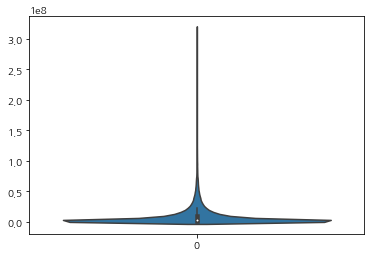

In [52]:
sns.violinplot(total_amount_by_customer['total_item_price'])
plt.show()

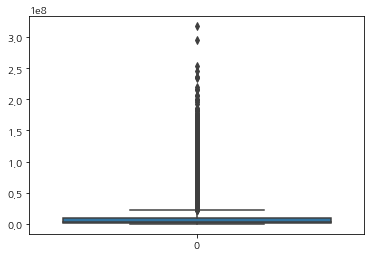

In [53]:
sns.boxplot(total_amount_by_customer['total_item_price'])
plt.show()

### amount_by_customer  2021

In [54]:
amount_by_customer_month = paid_transaction_trend.groupby(['customer_id', 'access_year'])['total_item_price'].agg(['sum', 'mean']).reset_index()
amount_by_customer_month = amount_by_customer_month.rename(columns={'mean':'avg_sales', 'sum':'total_sales'})
amount_by_customer_month = amount_by_customer_month.assign(total_sales_krw = amount_by_customer_month['total_sales'].astype(int))
amount_by_customer_month

customer_id  access_year  total_sales      avg_sales  total_sales_krw
0                 3         2018      1537413  307482.600000          1537413
1                 3         2019      5322822  354854.800000          5322822
2                 3         2020      4525397  266199.823529          4525397
3                 3         2021      6319257  300917.000000          6319257
4                 3         2022      2971545  270140.454545          2971545
...             ...          ...          ...            ...              ...
140473        99998         2019       657789  328894.500000           657789
140474        99998         2020       745587  248529.000000           745587
140475        99998         2021       850077  425038.500000           850077
140476        99998         2022      4214390  263399.375000          4214390
140477        99999         2016       186111  186111.000000           186111

[140478 rows x 5 columns]

In [55]:
total_amount_by_customer_month = amount_by_customer_month.sort_values('total_sales', ascending=False).reset_index(drop=True)
total_amount_by_customer_month

customer_id  access_year  total_sales      avg_sales  total_sales_krw
0             95492         2021    110789548  421253.034221        110789548
1              9079         2022     89137533  432706.470874         89137533
2             13789         2021     67809816  396548.631579         67809816
3             61147         2022     67133233  453602.925676         67133233
4             29496         2021     66718643  444790.953333         66718643
...             ...          ...          ...            ...              ...
140473        76395         2018        25476   25476.000000            25476
140474        38090         2016        24546   24546.000000            24546
140475        54192         2019        23705   23705.000000            23705
140476        17847         2018        22388   22388.000000            22388
140477        49040         2022        21885   21885.000000            21885

[140478 rows x 5 columns]

In [56]:
# 2021년 구매 고객 중 누가 많이 구매했는지 찾기 -> VIP 선정

total_amount_by_customer_month_2021 = total_amount_by_customer_month.loc[total_amount_by_customer_month['access_year']==2021].reset_index(drop=True)
total_amount_by_customer_month_2021

customer_id  access_year  total_sales      avg_sales  total_sales_krw
0            95492         2021    110789548  421253.034221        110789548
1            13789         2021     67809816  396548.631579         67809816
2            29496         2021     66718643  444790.953333         66718643
3            32658         2021     64801917  440829.367347         64801917
4            34082         2021     61789603  451019.000000         61789603
...            ...          ...          ...            ...              ...
36081         8026         2021        35771   35771.000000            35771
36082        79305         2021        33616   33616.000000            33616
36083        18584         2021        29118   29118.000000            29118
36084        21527         2021        27450   27450.000000            27450
36085        81801         2021        27092   27092.000000            27092

[36086 rows x 5 columns]

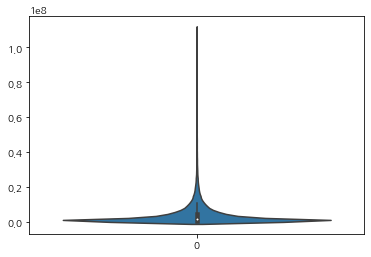

In [57]:
sns.violinplot(total_amount_by_customer_month_2021['total_sales'])
plt.show()

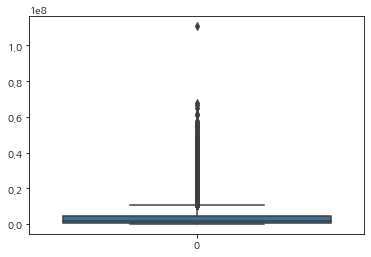

In [58]:
sns.boxplot(total_amount_by_customer_month_2021['total_sales'])
plt.show()

In [59]:
total_amount_by_customer_month_2021

customer_id  access_year  total_sales      avg_sales  total_sales_krw
0            95492         2021    110789548  421253.034221        110789548
1            13789         2021     67809816  396548.631579         67809816
2            29496         2021     66718643  444790.953333         66718643
3            32658         2021     64801917  440829.367347         64801917
4            34082         2021     61789603  451019.000000         61789603
...            ...          ...          ...            ...              ...
36081         8026         2021        35771   35771.000000            35771
36082        79305         2021        33616   33616.000000            33616
36083        18584         2021        29118   29118.000000            29118
36084        21527         2021        27450   27450.000000            27450
36085        81801         2021        27092   27092.000000            27092

[36086 rows x 5 columns]

In [60]:
Top_10per_2021_sales = total_amount_by_customer_month_2021['total_sales'].quantile(0.9)
Top_10per_2021_sales

9771382.0

In [61]:
top_10per_2021 = total_amount_by_customer_month_2021[total_amount_by_customer_month_2021['total_sales']>Top_10per_2021_sales]
top_10per_2021

customer_id  access_year  total_sales      avg_sales  total_sales_krw
0           95492         2021    110789548  421253.034221        110789548
1           13789         2021     67809816  396548.631579         67809816
2           29496         2021     66718643  444790.953333         66718643
3           32658         2021     64801917  440829.367347         64801917
4           34082         2021     61789603  451019.000000         61789603
...           ...          ...          ...            ...              ...
3604        94533         2021      9778776  444489.818182          9778776
3605         4230         2021      9776576  543143.111111          9776576
3606        25626         2021      9775170  337074.827586          9775170
3607         8191         2021      9775054  287501.588235          9775054
3608         9514         2021      9771981  574822.411765          9771981

[3609 rows x 5 columns]

In [62]:
top_10per_2021_customer_idx = top_10per_2021['customer_id'].to_list()
top_10per_2021_customer = customer[customer['customer_id'].isin(top_10per_2021_customer_idx)]
top_10per_2021_customer

customer_id first_name    last_name  \
2             7279    Bakiman  Simanjuntak   
57           46018      Limar      Prabowo   
77           96570       Vino      Gunawan   
96            1777       Devi     Andriani   
121          57346     Ibrani     Mahendra   
...            ...        ...          ...   
99923        21187      Nrima     Lazuardi   
99939        57339      Karma       Waluyo   
99969        75296        Ozy    Megantara   
99973        66067      Kamal        Hakim   
99982        35089        Edi      Hidayat   

                                   username  \
2      3250e5a3-1d23-4675-a647-3281879d42be   
57     c338fdcd-e1c4-4010-a20f-b1fac763d5c6   
77     6eaaf06d-cec7-4064-85d6-5dc9b496cc7a   
96     96f9958e-505a-41b0-9dd0-c22150688f35   
121    30db5517-2d16-484c-90ab-16e583fd08ce   
...                                     ...   
99923  b1cee7f6-7690-4766-8ab6-da85f377b10b   
99939  cd444eec-e226-4e88-b545-afb330ee245f   
99969  5cc39c33-e033-49ba-880d-104b51c1046a   
99973  8ee637c7-78cd-4691-b2f6-f7d989698956   
99982  9cdf8b1b-08f5-414e-8e6a-55e2424e614f   

                                                   email gender  birthdate  \
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
57     c338fdcd_e1c4_4010_a20f_b1fac763d5c6@startupca...      M 1995-10-27   
77     6eaaf06d_cec7_4064_85d6_5dc9b496cc7a@zakyfound...      M 1999-02-28   
96     96f9958e_505a_41b0_9dd0_c22150688f35@startupca...      F 2000-05-09   
121    30db5517_2d16_484c_90ab_16e583fd08ce@startupca...      M 2000-07-25   
...                                                  ...    ...        ...   
99923  b1cee7f6_7690_4766_8ab6_da85f377b10b@startupca...      M 1999-10-16   
99939  cd444eec_e226_4e88_b545_afb330ee245f@zakyfound...      M 1993-10-23   
99969  5cc39c33_e033_49ba_880d_104b51c1046a@startupca...      M 1988-12-12   
99973  8ee637c7_78cd_4691_b2f6_f7d989698956@startupca...      M 2002-06-04   
99982  9cdf8b1b_08f5_414e_8e6a_55e2424e614f@startupca...      M 1986-08-12   

      device_type                             device_id  \
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
57            iOS  a0203f8c-f041-416c-8055-0f381f6489ef   
77        Android  b74e80ec-32a2-4a78-881d-08b65a9fee5d   
96            iOS  5758039e-5a38-423a-9f95-a9cf4ef2ab15   
121       Android  fac5ed55-6793-49f2-a78c-3ed845c2a831   
...           ...                                   ...   
99923     Android  9dcd0487-b54a-41e6-b4ae-607d2b2cd3c4   
99939     Android  08d68402-d904-4197-aa5b-e1050a712de3   
99969     Android  26e3255b-a070-400f-ba99-533bba43ec1a   
99973     Android  bacddbc7-46f3-4938-b4bb-de154203016e   
99982     Android  1ede2e83-9f93-4901-bc67-37fd0656f7be   

                                  device_version  home_location_lat  \
2          iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
57         iPad; CPU iPad OS 9_3_6 like Mac OS X          -6.175562   
77                                 Android 6.0.1          -8.243490   
96     iPhone; CPU iPhone OS 4_2_1 like Mac OS X          -6.613383   
121                                Android 4.0.4          -6.244993   
...                                          ...                ...   
99923                                 Android 10          -8.461434   
99939                                Android 3.2          -6.711021   
99969                              Android 4.4.1          -8.576075   
99973                                Android 1.5          -8.356793   
99982                              Android 2.2.1          -7.808392   

       home_location_long        home_location home_country first_join_date  \
2              116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23   
57             106.930918         Jakarta Raya    Indonesia      2019-07-14   
77             114.545949                 Bali    Indonesia      2017-07-30   
96             106.848101           Jawa Barat    Indonesia      2019-11-0

In [63]:
temp = pd.concat([customer.value_counts('gender').sort_index(), top_10per_2021_customer.value_counts('gender').sort_index()], axis=1).rename(columns={0:'total_counts', 1:'top10_counts'})
temp2 =pd.concat([customer.value_counts('gender', normalize=True).sort_index()*100, top_10per_2021_customer.value_counts('gender', normalize=True).sort_index()*100], axis=1).rename(columns={0:'_percent', 1:'top10_percent'})
pd.concat([temp, temp2], axis=1)

total_counts  top10_counts  _percent  top10_percent
gender                                                     
F              64230          2338     64.23      64.782488
M              35770          1271     35.77      35.217512

In [64]:
print(f'전체 고객의 평균 나이는 {customer["age"].mean().round(1)}세 입니다.')
print(f'상위 10퍼센트 고객의 평균 나이는 {top_10per_2021_customer["age"].mean().round(1)}세 입니다.')

# 나이에 따른 평균 적인 구매력의 차이가 있을 것이라 생각했지만 딱히 없는 듯..

전체 고객의 평균 나이는 26.5세 입니다.
상위 10퍼센트 고객의 평균 나이는 26.3세 입니다.


# Trend

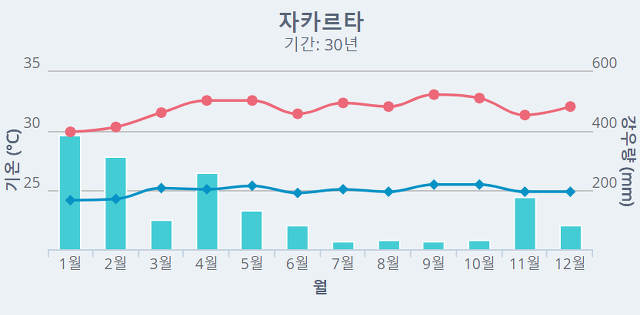

In [65]:
Image('./data/image/indonesia_weather.png')

# 자카르타 날씨 기준
# 5~10월사이는 건기
# 11~4월까지는 우기 / 12~1월은 집중적으로 비

# 롬복 날씨 기준
# 4~9월사이는 건기
# 10~3월까지는 우기

# 발리는 6~11월, 롬복은 5~6월이 여행하기 좋다고 한다.

In [66]:
customer_cnt__month_trend = paid_transaction_trend.groupby('access_ym')['customer_id'].nunique().to_frame().reset_index()
customer_cnt__month_trend = customer_cnt__month_trend.rename(columns={'customer_id':'customer_cnt'})
customer_cnt__month_trend

access_ym  customer_cnt
0    2016-06             1
1    2016-07           268
2    2016-08           466
3    2016-09           585
4    2016-10           774
..       ...           ...
69   2022-03         17655
70   2022-04         17891
71   2022-05         17564
72   2022-06         16319
73   2022-07          9974

[74 rows x 2 columns]

In [67]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [68]:
fig = px.line(customer_cnt__month_trend, x="access_ym", y="customer_cnt", title='customer_cnt by month')
fig.show()

In [69]:
amount__year_trend = paid_transaction_trend.groupby('access_year')['total_item_price'].sum().reset_index()
amount__year_trend/100000000

access_year  total_item_price
0      0.00002         25.308990
1      0.00002        177.464299
2      0.00002        379.391784
3      0.00002        603.240089
4      0.00002        902.924680
5      0.00002       1334.871238
6      0.00002       1008.433898

In [70]:
amount__month_trend = paid_transaction_trend.groupby('access_ym')['total_item_price'].agg(['mean', 'sum']).reset_index()
amount__month_trend = amount__month_trend.rename(columns={'mean':'avg_sales', 'sum':'total_sales'})
amount__month_trend

access_ym      avg_sales  total_sales
0    2016-06  630795.000000       630795
1    2016-07  379011.767196    143266448
2    2016-08  361847.110115    282602593
3    2016-09  404713.959961    414427095
4    2016-10  357954.174306    515454011
..       ...            ...          ...
69   2022-03  369866.118711  14930385614
70   2022-04  368196.548929  15223454512
71   2022-05  367135.404237  15561401244
72   2022-06  368726.944043  14846052948
73   2022-07  371325.099221  13109632628

[74 rows x 3 columns]

In [71]:
amount__month_trend = paid_transaction_trend.groupby('access_ym')['total_item_price'].agg(['mean', 'sum']).reset_index()
amount__month_trend = amount__month_trend.rename(columns={'mean':'avg_sales', 'sum':'total_sales'})
amount__month_trend

access_ym      avg_sales  total_sales
0    2016-06  630795.000000       630795
1    2016-07  379011.767196    143266448
2    2016-08  361847.110115    282602593
3    2016-09  404713.959961    414427095
4    2016-10  357954.174306    515454011
..       ...            ...          ...
69   2022-03  369866.118711  14930385614
70   2022-04  368196.548929  15223454512
71   2022-05  367135.404237  15561401244
72   2022-06  368726.944043  14846052948
73   2022-07  371325.099221  13109632628

[74 rows x 3 columns]

In [72]:
fig = px.line(amount__month_trend, x="access_ym", y="total_sales", title='Sales by month')
fig.show()

# 계속 성장하고 있으나
# 2월과 6월에 조금 성장이 주춤하는 경향이 있음
# 왜인지 잘 모르겠음

# 우선 계속 우상향하고 있는 것으로 보여짐

In [73]:
fig = make_subplots(rows=2, cols=4)
fig.update_layout(width=1500,height=600)

fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2016')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2016')]["total_sales"], 
               mode='lines', name='2016'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2017')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2017')]["total_sales"], 
               mode='lines', name='2017'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2018')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2018')]["total_sales"], 
               mode='lines', name='2018'),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2019')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2019')]["total_sales"], 
               mode='lines', name='2019'),
    row=1, col=4
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2020')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2020')]["total_sales"], 
               mode='lines', name='2020'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2021')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2021')]["total_sales"], 
               mode='lines', name='2021'),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2022')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2022')]["total_sales"], 
               mode='lines', name='2022'),
    row=2, col=3
)
fig.show()

In [74]:
fig = px.line(amount__month_trend, x="access_ym", y="avg_sales", title='Sales by month')
fig.show()

In [75]:
product_brand['season'].value_counts()

# 겨울 옷은 우기와 연관이 있을지도 -> Winter? 우박 내리기도 함

Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: season, dtype: int64

## year_month pivot(total_price)

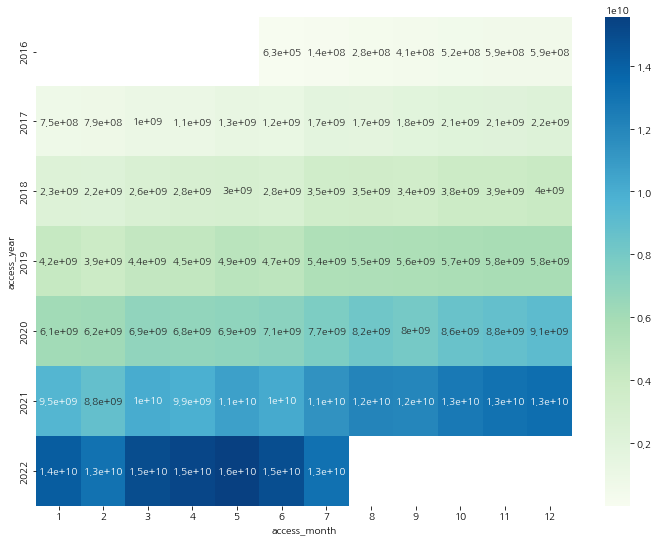

In [76]:
plt.figure(figsize=(12,9))
sns.heatmap(pd.pivot_table(paid_transaction_trend,
                       index = 'access_year',
                       columns = 'access_month',
                       values = 'total_item_price',
                       aggfunc = 'sum'), 
            cmap='GnBu', annot=True)
plt.show()

## month_day pivot(total_price)

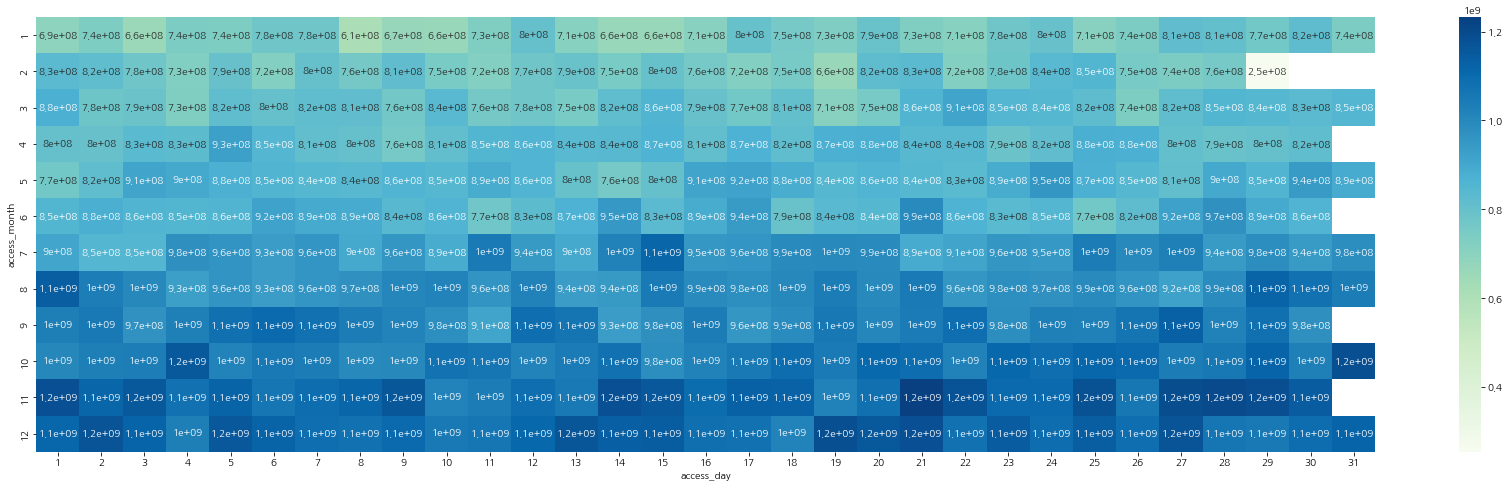

In [77]:
# 2017년부터 2021년(6개월씩 짤린거 빼고)
# 월, 일별 매출

plt.figure(figsize=(30,8))
sns.heatmap(pd.pivot_table(paid_transaction_trend.loc[~paid_transaction_trend['access_year'].isin([2016,2022])],
                       index = 'access_month',
                       columns = 'access_day',
                       values = 'total_item_price',
                       aggfunc = 'sum'), 
            cmap='GnBu', annot=True)
plt.show()

## day_dayofweek pivot(total_price)

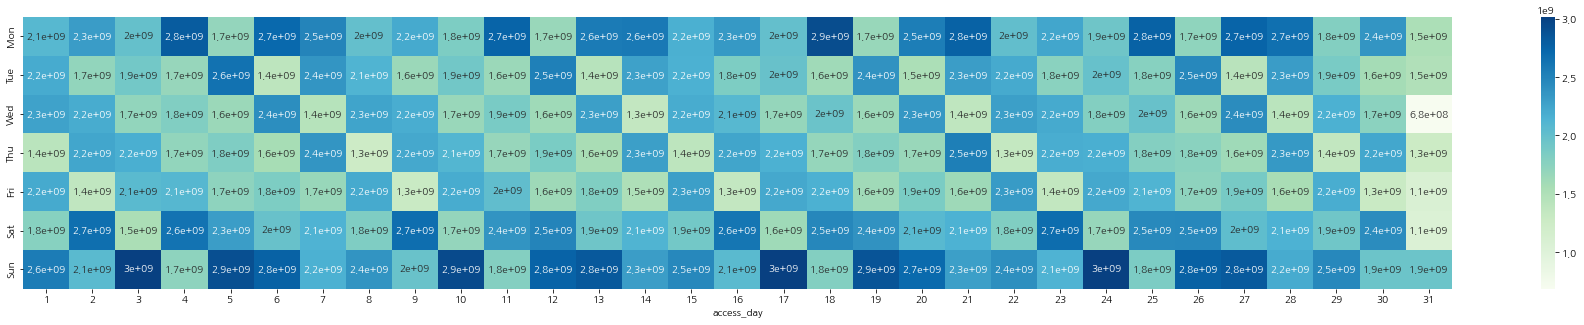

In [78]:
day_of_week = pd.Series(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.figure(figsize=(32,5))
sns.heatmap(pd.pivot_table(paid_transaction_trend,
                       index = 'access_day_of_week',
                       columns = 'access_day',
                       values = 'total_item_price',
                       aggfunc = 'sum').set_index(day_of_week), 
            cmap='GnBu', annot=True)
plt.show()

## hour_dayofweek pivot(total_price)

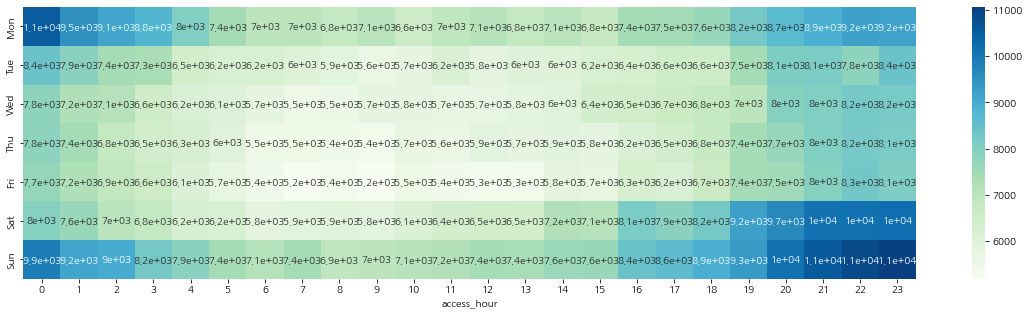

In [173]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_trend,
                       index = 'access_day_of_week',
                       columns = 'access_hour',
                       values = 'total_item_price',
                       aggfunc = 'count').set_index(day_of_week), 
            cmap='GnBu', annot=True)
plt.show()

# Sales

In [80]:
transaction_product = pd.merge(transaction_trend, product_brand, how='left', left_on='product_id', right_on='id')
transaction_product

created_at  customer_id  \
0       2016-06-30 23:18:44.792905+00:00        74089   
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
3       2016-07-01 09:45:51.803842+00:00        16228   
4       2016-07-01 22:32:45.218400+00:00        73773   
...                                  ...          ...   
1254580 2022-07-31 23:58:50.469277+00:00        81975   
1254581 2022-07-31 23:58:53.821469+00:00        19551   
1254582 2022-07-31 23:59:03.408424+00:00        22285   
1254583 2022-07-31 23:59:19.821469+00:00        19551   
1254584 2022-07-31 23:59:45.821469+00:00        19551   

                                   booking_id  \
0        2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
3        8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
4        5f390336-0a5f-4e0d-bfe1-df080269ce45   
...                                       ...   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254581  a465f4f3-6b1e-4421-9e71-979775a68c6c   
1254582  a43bfc27-6a49-465b-8690-901b8d79acef   
1254583  1f9b9f8a-1a72-4e4c-87a6-355390a7abf6   
1254584  a5d9891f-f7fc-4b6e-89b1-cece6367d4f8   

                                   session_id payment_method payment_status  \
0        607d864b-76b5-45a1-a45d-7fb666a03ea1        LinkAja        Success   
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
3        bbff775e-4166-46aa-bbfd-4ba6465add17     Debit Card        Success   
4        8f385c80-1b70-4861-80ac-5eb3b5620fee     Debit Card        Success   
...                                       ...            ...            ...   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea    Credit Card        Success   
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25        LinkAja        Success   
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9          Gopay        Success   
1254584  95168514-c4a8-4611-8739-c45dc6374b43    Credit Card         Failed   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                   0          NaN         10000  2016-07-04T17:35:37.193849Z   
1                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
2                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
3                   0          NaN         15000  2016-07-03T19:10:36.530785Z   
4                   0          NaN         10000  2016-07-06T16:02:10.388144Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254581          5800  WEEKENDSERU         10000  2022-08-05T06:00:29.292277Z   
1254582             0          NaN          5000  2022-08-05T14:56:15.207147Z   
1254583             0          NaN          5000  2022-08-04T15:27:36.340498Z   
1254584          6489    LIBURDONG         10000  2022-08-04T23:57:37.166408Z   

         ...  gender  masterCategory  subCategory   articleType  baseColour  \
0        ...     Men         Apparel      Topwear       Tshirts   Navy Blue   
1        ...     Men         Apparel   Bottomwear      Trousers       Olive   
2        ...     Men        Footwear        Shoes  Sports Shoes         Red   
3        ...   Women         Apparel        Dress       Dresses       Black   
4        ...     Men        Footwear   Flip Flops    Flip Flops         Red   
...      ...     ...             ...          ...           ...         ...   
1254580  ...   Women         Apparel      Topwear          Tops       Black   
1254581  ...     Men     Accessories        Belts         Belts       Brown   
1254582  ...   Women         Apparel    Innerwear           Bra       White   
1254583  ...   Women     Accessories        

In [81]:
transaction_product = transaction_product.drop('id', axis=1)
transaction_product

created_at  customer_id  \
0       2016-06-30 23:18:44.792905+00:00        74089   
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
3       2016-07-01 09:45:51.803842+00:00        16228   
4       2016-07-01 22:32:45.218400+00:00        73773   
...                                  ...          ...   
1254580 2022-07-31 23:58:50.469277+00:00        81975   
1254581 2022-07-31 23:58:53.821469+00:00        19551   
1254582 2022-07-31 23:59:03.408424+00:00        22285   
1254583 2022-07-31 23:59:19.821469+00:00        19551   
1254584 2022-07-31 23:59:45.821469+00:00        19551   

                                   booking_id  \
0        2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
3        8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
4        5f390336-0a5f-4e0d-bfe1-df080269ce45   
...                                       ...   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254581  a465f4f3-6b1e-4421-9e71-979775a68c6c   
1254582  a43bfc27-6a49-465b-8690-901b8d79acef   
1254583  1f9b9f8a-1a72-4e4c-87a6-355390a7abf6   
1254584  a5d9891f-f7fc-4b6e-89b1-cece6367d4f8   

                                   session_id payment_method payment_status  \
0        607d864b-76b5-45a1-a45d-7fb666a03ea1        LinkAja        Success   
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
3        bbff775e-4166-46aa-bbfd-4ba6465add17     Debit Card        Success   
4        8f385c80-1b70-4861-80ac-5eb3b5620fee     Debit Card        Success   
...                                       ...            ...            ...   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea    Credit Card        Success   
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25        LinkAja        Success   
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9          Gopay        Success   
1254584  95168514-c4a8-4611-8739-c45dc6374b43    Credit Card         Failed   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                   0          NaN         10000  2016-07-04T17:35:37.193849Z   
1                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
2                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
3                   0          NaN         15000  2016-07-03T19:10:36.530785Z   
4                   0          NaN         10000  2016-07-06T16:02:10.388144Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254581          5800  WEEKENDSERU         10000  2022-08-05T06:00:29.292277Z   
1254582             0          NaN          5000  2022-08-05T14:56:15.207147Z   
1254583             0          NaN          5000  2022-08-04T15:27:36.340498Z   
1254584          6489    LIBURDONG         10000  2022-08-04T23:57:37.166408Z   

         ...  gender  masterCategory  subCategory   articleType  baseColour  \
0        ...     Men         Apparel      Topwear       Tshirts   Navy Blue   
1        ...     Men         Apparel   Bottomwear      Trousers       Olive   
2        ...     Men        Footwear        Shoes  Sports Shoes         Red   
3        ...   Women         Apparel        Dress       Dresses       Black   
4        ...     Men        Footwear   Flip Flops    Flip Flops         Red   
...      ...     ...             ...          ...           ...         ...   
1254580  ...   Women         Apparel      Topwear          Tops       Black   
1254581  ...     Men     Accessories        Belts         Belts       Brown   
1254582  ...   Women         Apparel    Innerwear           Bra       White   
1254583  ...   Women     Accessories        

In [82]:
transaction_product['season'].value_counts()

Summer    606321
Fall      321851
Winter    240886
Spring     84305
Name: season, dtype: int64

In [83]:
transaction_product['gender'].value_counts()

Men       624729
Women     526897
Unisex     60513
Boys       23543
Girls      18284
Name: gender, dtype: int64

In [84]:
pd.crosstab(transaction_product['season'], transaction_product['gender'])

gender   Boys  Girls     Men  Unisex   Women
season                                      
Fall     3197   2291  199363   14006  102994
Spring    159     74   27319    2722   54031
Summer  19602  14959  306812   26388  238560
Winter    585    960   91010   17226  131105

In [85]:
pd.crosstab(transaction_product['season'], transaction_product['masterCategory'])

masterCategory  Accessories  Apparel  Footwear  Free Items  Home  \
season                                                             
Fall                  34043   217825     69662           0    19   
Spring                 3057     3980     10193         161     0   
Summer               128755   357648    117300        1247     0   
Winter               151837    24735     62658        1579     0   

masterCategory  Personal Care  Sporting Goods  
season                                         
Fall                        0             302  
Spring                  66914               0  
Summer                   1052             319  
Winter                     22              55

In [86]:
pd.crosstab(transaction_product['gender'], transaction_product['masterCategory'])

masterCategory  Accessories  Apparel  Footwear  Free Items  Home  \
gender                                                             
Boys                    472    21539      1532           0     0   
Girls                   755    15882      1647           0     0   
Men                  124254   320375    162177        1499     0   
Unisex                41865     2712     14601         239    19   
Women                150346   243708     80431        1249     0   

masterCategory  Personal Care  Sporting Goods  
gender                                         
Boys                        0               0  
Girls                       0               0  
Men                     16424               0  
Unisex                    401             676  
Women                   51163               0

In [87]:
paid_transaction_product = transaction_product[transaction_product['payment_status']=='Success']
paid_transaction_product

created_at  customer_id  \
0       2016-06-30 23:18:44.792905+00:00        74089   
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
3       2016-07-01 09:45:51.803842+00:00        16228   
4       2016-07-01 22:32:45.218400+00:00        73773   
...                                  ...          ...   
1254579 2022-07-31 23:58:50.469277+00:00        81975   
1254580 2022-07-31 23:58:50.469277+00:00        81975   
1254581 2022-07-31 23:58:53.821469+00:00        19551   
1254582 2022-07-31 23:59:03.408424+00:00        22285   
1254583 2022-07-31 23:59:19.821469+00:00        19551   

                                   booking_id  \
0        2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
3        8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
4        5f390336-0a5f-4e0d-bfe1-df080269ce45   
...                                       ...   
1254579  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254581  a465f4f3-6b1e-4421-9e71-979775a68c6c   
1254582  a43bfc27-6a49-465b-8690-901b8d79acef   
1254583  1f9b9f8a-1a72-4e4c-87a6-355390a7abf6   

                                   session_id payment_method payment_status  \
0        607d864b-76b5-45a1-a45d-7fb666a03ea1        LinkAja        Success   
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
3        bbff775e-4166-46aa-bbfd-4ba6465add17     Debit Card        Success   
4        8f385c80-1b70-4861-80ac-5eb3b5620fee     Debit Card        Success   
...                                       ...            ...            ...   
1254579  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea    Credit Card        Success   
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25        LinkAja        Success   
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9          Gopay        Success   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                   0          NaN         10000  2016-07-04T17:35:37.193849Z   
1                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
2                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
3                   0          NaN         15000  2016-07-03T19:10:36.530785Z   
4                   0          NaN         10000  2016-07-06T16:02:10.388144Z   
...               ...          ...           ...                          ...   
1254579             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254580             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254581          5800  WEEKENDSERU         10000  2022-08-05T06:00:29.292277Z   
1254582             0          NaN          5000  2022-08-05T14:56:15.207147Z   
1254583             0          NaN          5000  2022-08-04T15:27:36.340498Z   

         ...  gender  masterCategory  subCategory   articleType  baseColour  \
0        ...     Men         Apparel      Topwear       Tshirts   Navy Blue   
1        ...     Men         Apparel   Bottomwear      Trousers       Olive   
2        ...     Men        Footwear        Shoes  Sports Shoes         Red   
3        ...   Women         Apparel        Dress       Dresses       Black   
4        ...     Men        Footwear   Flip Flops    Flip Flops         Red   
...      ...     ...             ...          ...           ...         ...   
1254579  ...   Women         Apparel      Topwear        Shirts       Black   
1254580  ...   Women         Apparel      Topwear          Tops       Black   
1254581  ...     Men     Accessories        Belts         Belts       Brown   
1254582  ...   Women         Apparel    Inne

In [88]:
paid_transaction_product.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'time_diff', 'access_ym', 'access_year', 'access_month',
       'access_day', 'access_hour', 'access_day_of_week', 'total_item_price',
       'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'year', 'usage', 'productDisplayName', 'brand'],
      dtype='object')

In [89]:
paid_transaction_product['season'].value_counts()

Summer    580532
Fall      308223
Winter    230469
Spring     80642
Name: season, dtype: int64

In [90]:
paid_transaction_product['gender'].value_counts()

Men       598393
Women     504099
Unisex     57911
Boys       22561
Girls      17480
Name: gender, dtype: int64

In [91]:
paid_transaction_product['masterCategory'].value_counts()

Apparel           578738
Accessories       303952
Footwear          249236
Personal Care      65006
Free Items          2851
Sporting Goods       646
Home                  15
Name: masterCategory, dtype: int64

In [92]:
paid_transaction_product['subCategory'].value_counts()

Topwear                     415939
Shoes                       198722
Bags                         82527
Bottomwear                   73054
Watches                      68357
Innerwear                    49137
Jewellery                    29071
Eyewear                      28953
Fragrance                    27330
Sandal                       25765
Wallets                      25209
Flip Flops                   24749
Belts                        21950
Socks                        18895
Lips                         14243
Dress                        12968
Loungewear and Nightwear     12769
Saree                        11673
Nails                         8912
Makeup                        8408
Headwear                      7850
Ties                          6825
Accessories                   3478
Scarves                       3209
Apparel Set                   2836
Free Gifts                    2821
Cufflinks                     2818
Stoles                        2479
Skin Care           

In [93]:
paid_transaction_product['articleType'].value_counts()

Tshirts                190657
Shirts                  86990
Casual Shoes            76781
Watches                 68357
Sports Shoes            55115
                        ...  
Ipad                       30
Shoe Laces                 29
Body Wash and Scrub        26
Hair Accessory             22
Cushion Covers             15
Name: articleType, Length: 143, dtype: int64

## Sales by Category

In [94]:
# 단위 백만원
paid_transaction_product.groupby('masterCategory')['total_item_price'].sum().sort_values(ascending=False)/1000000

masterCategory
Apparel           213208.368368
Accessories       112423.492156
Footwear           92023.417135
Personal Care      24030.876903
Free Items          1029.989277
Sporting Goods       229.087038
Home                   4.818442
Name: total_item_price, dtype: float64

In [95]:
# 단위 백만원
paid_transaction_product.groupby('subCategory')['total_item_price'].sum().sort_values(ascending=False)/1000000

subCategory
Topwear                     153552.656882
Shoes                        73401.354243
Bags                         30589.195627
Bottomwear                   26712.957612
Watches                      25322.557178
Innerwear                    18021.467531
Jewellery                    10806.583726
Eyewear                      10660.562997
Fragrance                    10078.274885
Sandal                        9565.720119
Wallets                       9311.073071
Flip Flops                    9056.342773
Belts                         8122.224857
Socks                         6895.867311
Lips                          5259.965992
Dress                         4776.287194
Loungewear and Nightwear      4703.395654
Saree                         4262.662994
Nails                         3285.692455
Makeup                        3098.167317
Headwear                      2988.521572
Ties                          2552.625374
Accessories                   1282.821744
Scarves               

In [96]:
paid_transaction_product.groupby('articleType')['total_item_price'].sum().sort_values(ascending=False)/1000000

articleType
Tshirts                70370.335381
Shirts                 32180.727257
Casual Shoes           28385.558698
Watches                25322.557178
Sports Shoes           20502.558391
                           ...     
Mens Grooming Kit          9.159035
Body Wash and Scrub        8.906188
Ipad                       8.514235
Hair Accessory             7.962157
Cushion Covers             4.818442
Name: total_item_price, Length: 143, dtype: float64

## Season(product)_Gender(product) pivot(total_price)

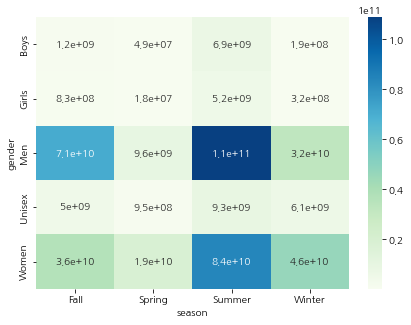

In [97]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='gender', columns='season', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Season(Product)_Category pivot(total_price)

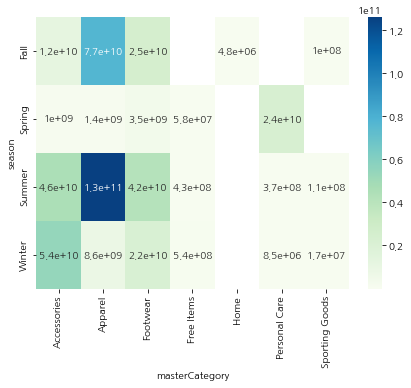

In [98]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='season', columns='masterCategory', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Season(product)_Month pivot(total_price)

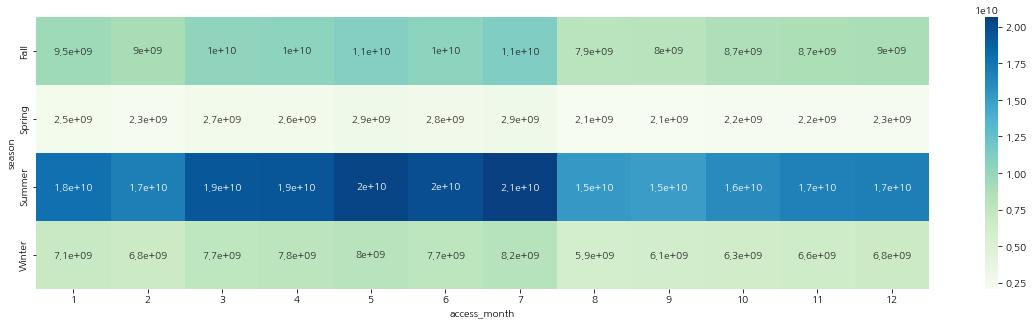

In [99]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='season', columns='access_month', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Gender(product)_Category pivot(total_price)

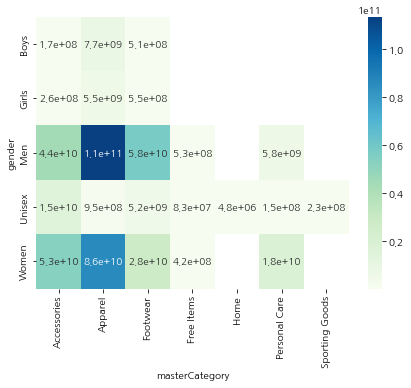

In [100]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='gender', columns='masterCategory', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Gender(product)_Month pivot(total_price)

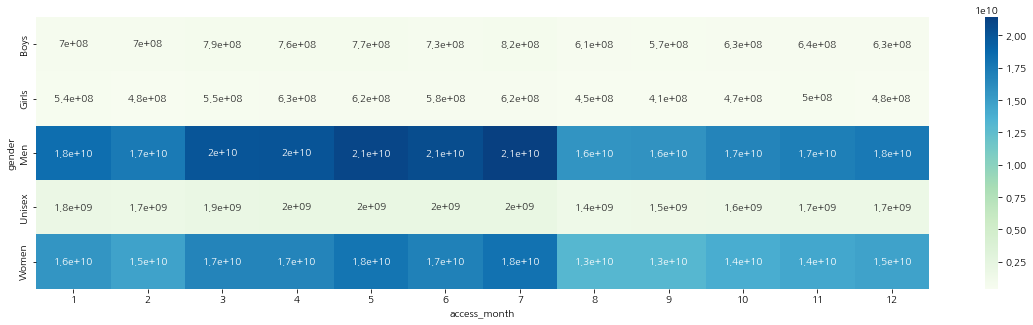

In [101]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='gender', columns='access_month', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## MasterCategory_subCategory pivot(total_price)

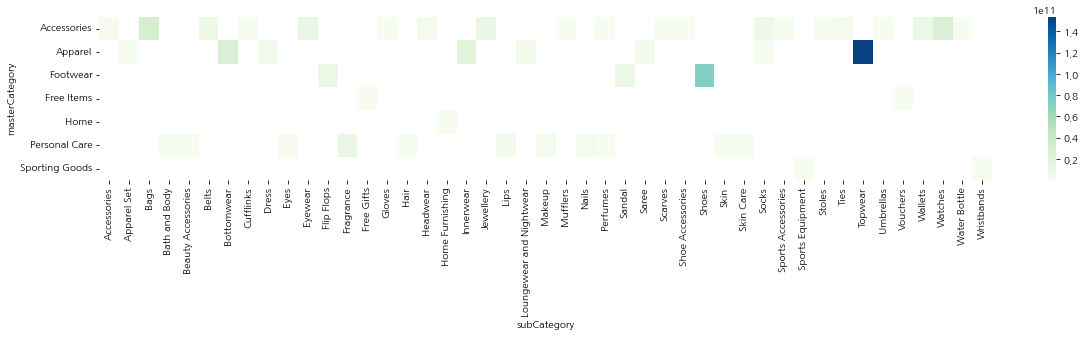

In [102]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='masterCategory', columns='subCategory', aggfunc='sum'),
            cmap='GnBu')
plt.show()

## MasterCategory_ArticleType pivot(total_price)

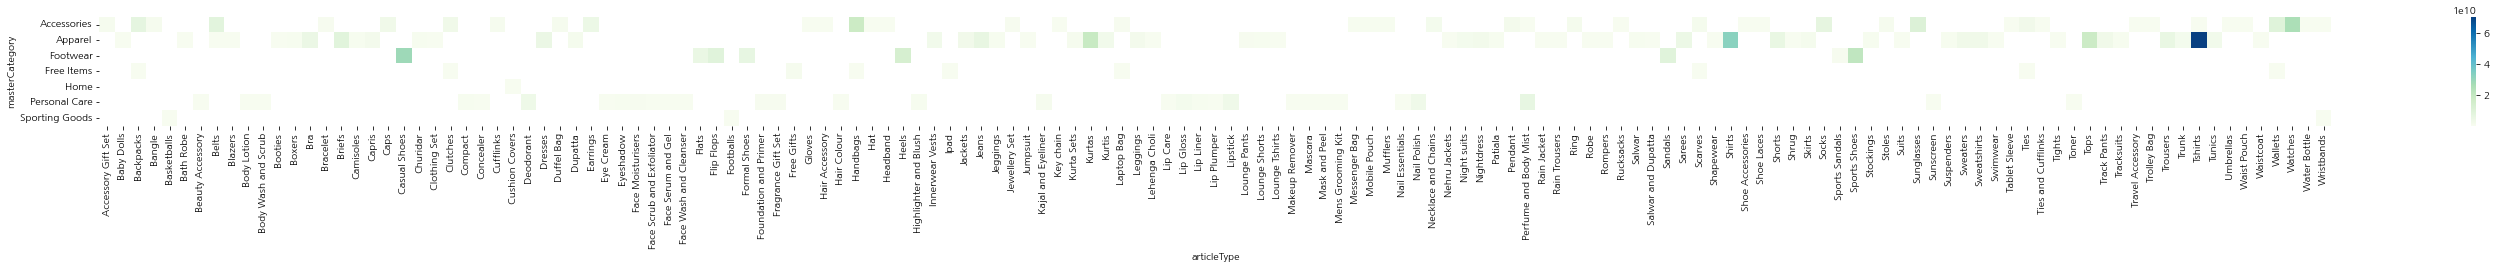

In [103]:
plt.figure(figsize=(50,2))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='masterCategory', columns='articleType', aggfunc='sum'),
            cmap='GnBu')
plt.show()

## SubCategory_ArticleType pivot(total_price)

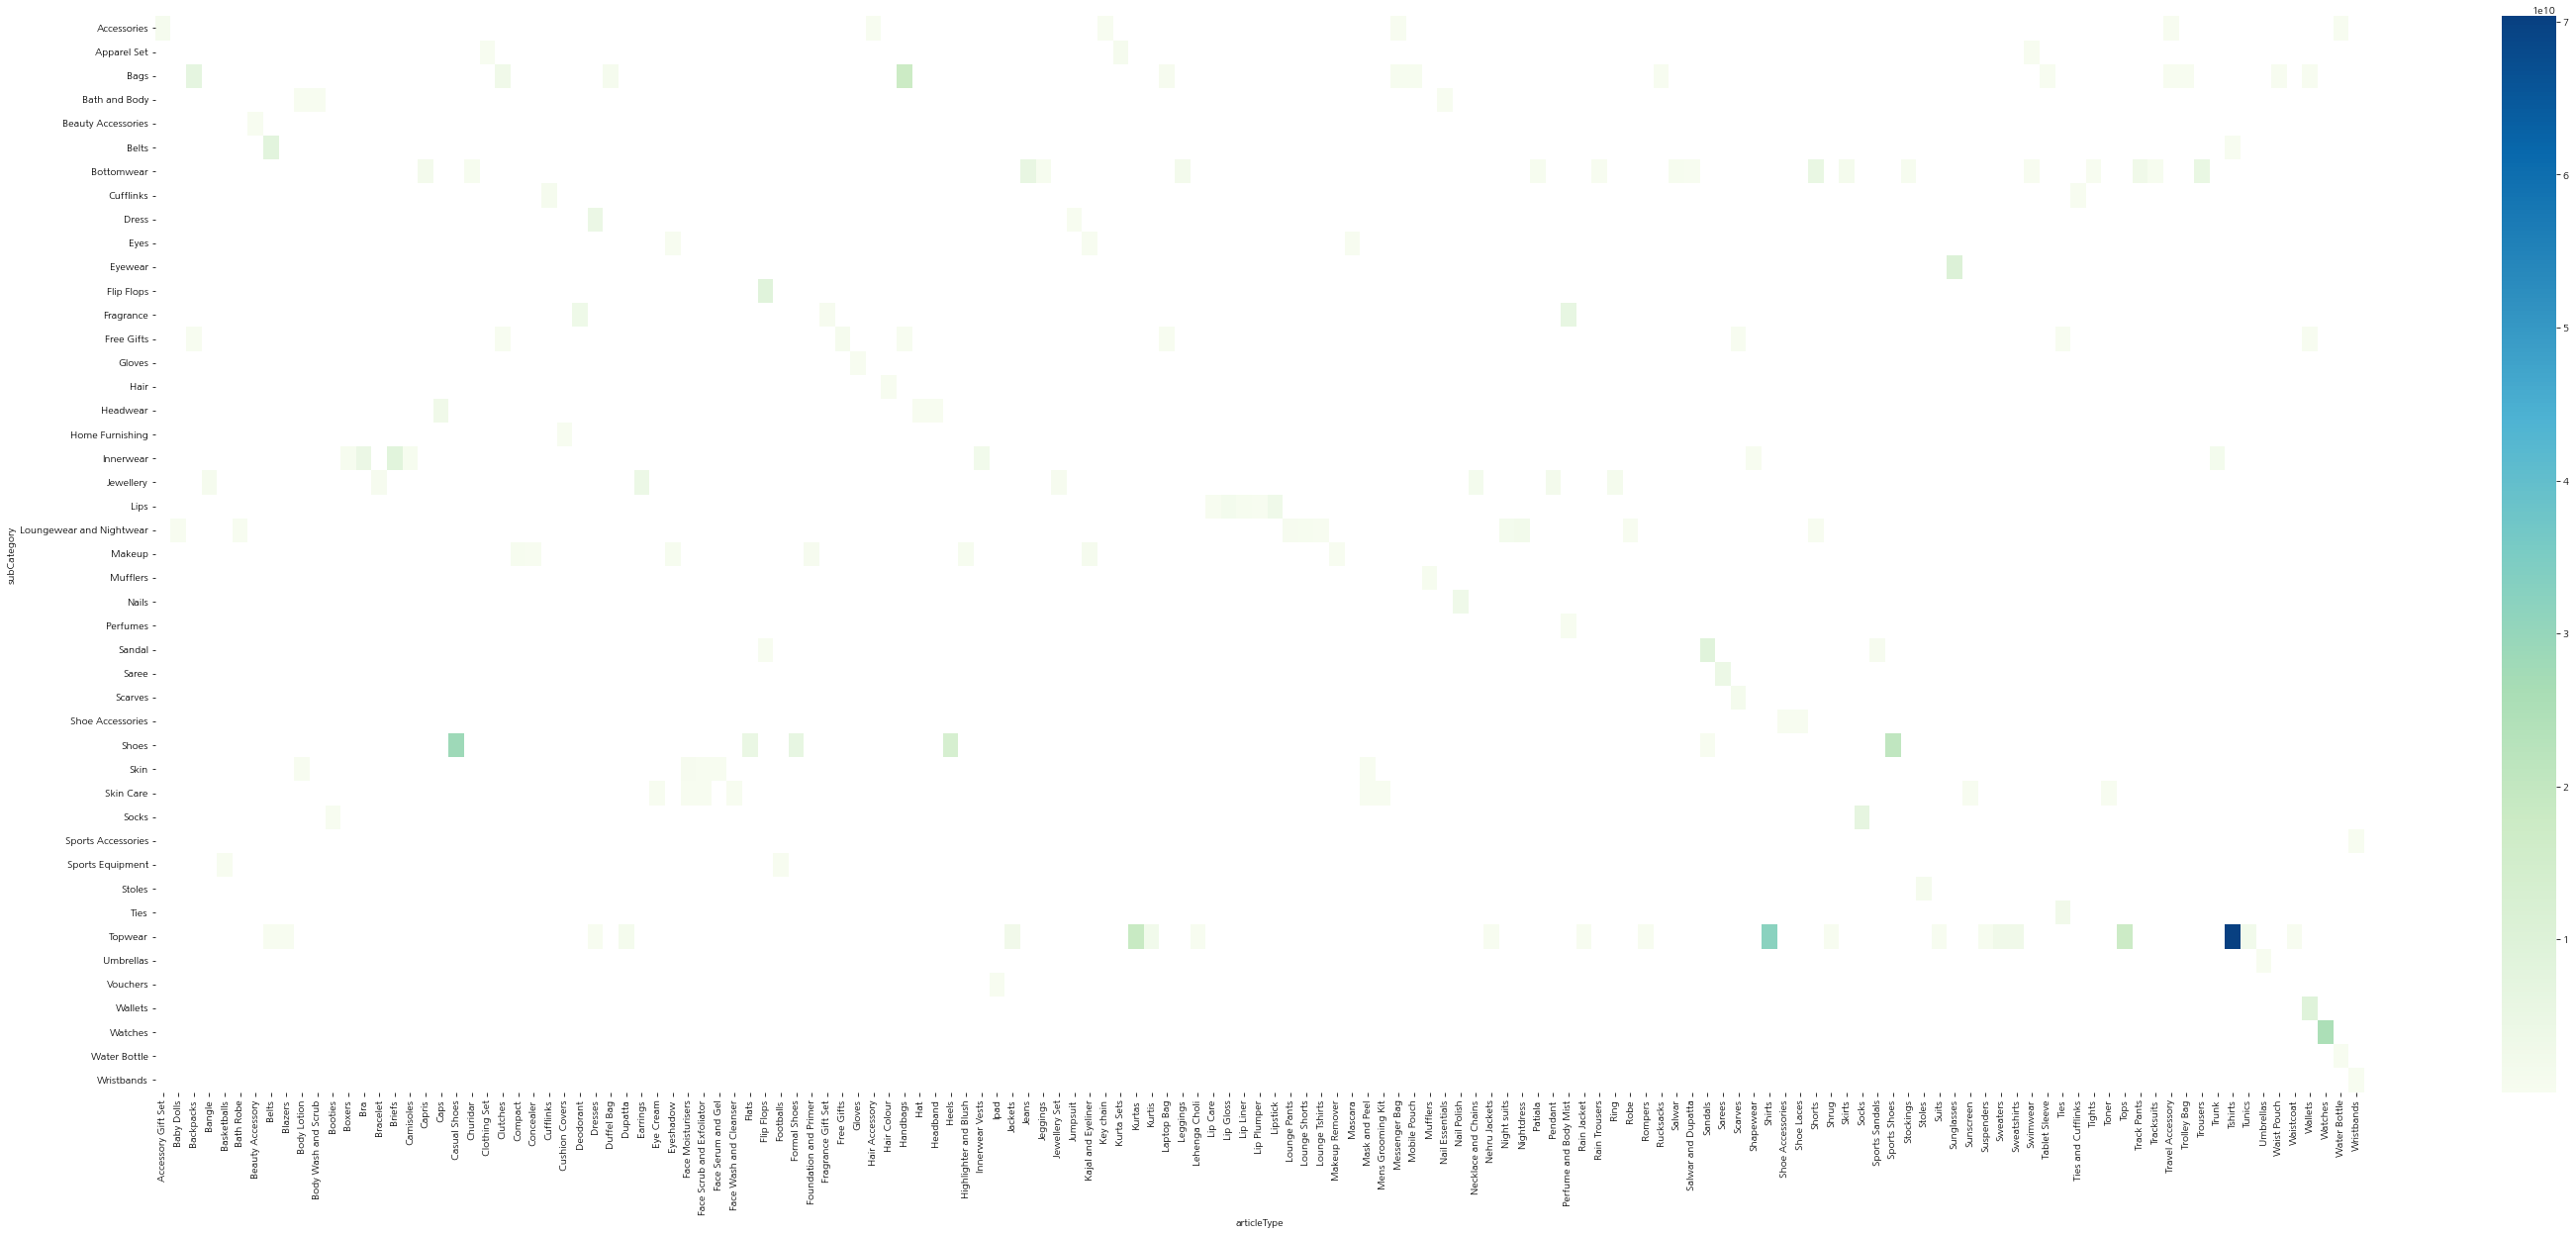

In [104]:
plt.figure(figsize=(50,20))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price', index='subCategory', columns='articleType', aggfunc='sum'),
            cmap='GnBu')
plt.show()

In [105]:
# 결제수단별로 평균 1회 구매액의 차이가 있을까? -> 다 비슷해 보임

sales_by_payment_method = paid_transaction_product.groupby('payment_method')['total_item_price'].agg(['sum', 'count'])
sales_by_payment_method = sales_by_payment_method.assign(pay_per_time=round(sales_by_payment_method['sum']/sales_by_payment_method['count'], 2)).sort_values('count', ascending=False)
sales_by_payment_method

sum   count  pay_per_time
payment_method                                    
Credit Card     155591427226  420997     369578.47
Gopay            88665639630  240951     367982.04
OVO              87975145989  238745     368490.00
Debit Card       71486819811  193705     369049.95
LinkAja          39444465164  106637     369894.74

# Merge transaction_product_customer data

In [106]:
transaction_product_customer = pd.merge(transaction_product.rename(columns={'gender':'product_gender'}),
                                        customer[['customer_id', 'gender', 'first_join_date', 'age', 'home_location_lat', 'home_location_long', 'home_location']], how='left')
transaction_product_customer

created_at  customer_id  \
0       2016-06-30 23:18:44.792905+00:00        74089   
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
3       2016-07-01 09:45:51.803842+00:00        16228   
4       2016-07-01 22:32:45.218400+00:00        73773   
...                                  ...          ...   
1254580 2022-07-31 23:58:50.469277+00:00        81975   
1254581 2022-07-31 23:58:53.821469+00:00        19551   
1254582 2022-07-31 23:59:03.408424+00:00        22285   
1254583 2022-07-31 23:59:19.821469+00:00        19551   
1254584 2022-07-31 23:59:45.821469+00:00        19551   

                                   booking_id  \
0        2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
3        8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
4        5f390336-0a5f-4e0d-bfe1-df080269ce45   
...                                       ...   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254581  a465f4f3-6b1e-4421-9e71-979775a68c6c   
1254582  a43bfc27-6a49-465b-8690-901b8d79acef   
1254583  1f9b9f8a-1a72-4e4c-87a6-355390a7abf6   
1254584  a5d9891f-f7fc-4b6e-89b1-cece6367d4f8   

                                   session_id payment_method payment_status  \
0        607d864b-76b5-45a1-a45d-7fb666a03ea1        LinkAja        Success   
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
3        bbff775e-4166-46aa-bbfd-4ba6465add17     Debit Card        Success   
4        8f385c80-1b70-4861-80ac-5eb3b5620fee     Debit Card        Success   
...                                       ...            ...            ...   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254581  9b4975c7-b06d-4d9a-b6b8-6bcda06540ea    Credit Card        Success   
1254582  f837b3a2-7908-42df-8969-3f879ebb4c25        LinkAja        Success   
1254583  b0043d8b-2b6a-443a-80f2-567486e79bf9          Gopay        Success   
1254584  95168514-c4a8-4611-8739-c45dc6374b43    Credit Card         Failed   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                   0          NaN         10000  2016-07-04T17:35:37.193849Z   
1                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
2                6053       XX2022         10000  2016-07-06T03:05:41.261218Z   
3                   0          NaN         15000  2016-07-03T19:10:36.530785Z   
4                   0          NaN         10000  2016-07-06T16:02:10.388144Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2022-08-04T21:34:30.005045Z   
1254581          5800  WEEKENDSERU         10000  2022-08-05T06:00:29.292277Z   
1254582             0          NaN          5000  2022-08-05T14:56:15.207147Z   
1254583             0          NaN          5000  2022-08-04T15:27:36.340498Z   
1254584          6489    LIBURDONG         10000  2022-08-04T23:57:37.166408Z   

         ...    year   usage                          productDisplayName  \
0        ...  2012.0  Casual   arrow new york men navy blue polo t-shirt   
1        ...  2011.0  Casual          highlander men solid olive trouser   
2        ...  2011.0  Sports          nike men's flyclave red white shoe   
3        ...  2012.0  Casual              femella women black lace dress   
4        ...  2012.0  Casual         adidas men adi surge red flip flops   
...      ...     ...     ...                                         ...   
1254580  ...  2012.0  Casual              latin quarters women black top   
1254581  ...  2011.0  Formal                reid & taylor men brown belt   
1254582  ...  2017.0  Casual  jockey essence jane white t-shirt bra 1243   
1254583  ...  2015.0  Casual     lino perros women classic beige handbag  

In [107]:
paid_customer_sales = transaction_product_customer[transaction_product_customer['payment_status']=='Success']
cancelld_customer_sales = transaction_product_customer[transaction_product_customer['payment_status']=='Success']

In [108]:
# 지역별로 평균 1회 구매액의 차이가 있을까? -> 다 비슷해 보임

sales_by_location = paid_customer_sales.groupby('home_location')['total_item_price'].agg(['sum', 'count'])
sales_by_location = sales_by_location.assign(pay_per_time=round(sales_by_location['sum']/sales_by_location['count'], 2)).sort_values('count', ascending=False)
sales_by_location

sum   count  pay_per_time
home_location                                         
Jakarta Raya         81659825347  220982     369531.57
Jawa Barat           52744108788  143065     368672.34
Jawa Tengah          48905503472  132792     368286.52
Jawa Timur           42512400839  115075     369432.12
Yogyakarta           34511819065   93577     368806.64
Kalimantan Barat     23784059570   64876     366607.98
Lampung              23617902718   64132     368270.17
Kalimantan Tengah    19156676303   52102     367676.41
Kalimantan Selatan   18168811323   49329     368319.07
Kalimantan Timur     12506237633   33637     371800.03
Maluku               11240297000   30564     367762.63
Kepulauan Riau        9212242467   24793     371566.27
Bali                  7067891429   19074     370551.09
Sumatera Barat        5836467941   15860     367999.24
Nusa Tenggara Barat   5778470618   15493     372973.00
Sulawesi Utara        5441984757   14692     370404.63
Sumatera Utara        4634706436   12372     374612.55
Sulawesi Barat        4198210146   11414     367812.35
Sumatera Selatan      3911974909   10517     371966.81
Papua                 3572915005    9724     367432.64
Papua Barat           3174255825    8746     362938.01
Bengkulu              3057828181    8156     374917.63
Sulawesi Selatan      2985092583    8084     369259.35
Nusa Tenggara Timur   2615100973    7121     367237.88
Gorontalo             1878459750    5201     361172.80
Sulawesi Tengah       1817060466    4918     369471.42
Maluku Utara          1742406984    4734     368062.31
Banten                1753587907    4574     383381.70
Jambi                 1689518462    4541     372058.68
Aceh                  1222767708    3467     352687.54
Bangka Belitung       1167654598    3203     364550.30
Sulawesi Tenggara      919727813    2408     381946.77
Riau                   677530804    1812     373913.25

In [109]:
display(paid_customer_sales.groupby('gender')['total_item_price'].sum().sort_values(ascending=False).to_frame())
display(paid_customer_sales.groupby('product_gender')['total_item_price'].sum().sort_values(ascending=False).to_frame())

total_item_price
gender                  
F           282692575159
M           160470922661

total_item_price
product_gender                  
Men                 221449798685
Women               185425698636
Unisex               21369473654
Boys                  8353319586
Girls                 6351758758

## Gender(product)_ Gender pivot(total_price)

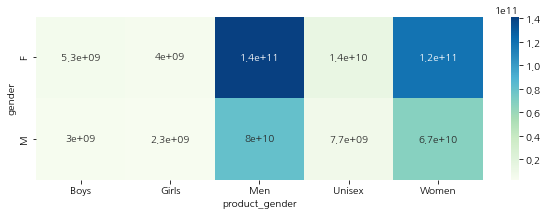

In [110]:
plt.figure(figsize=(10,3))
sns.heatmap(pd.pivot_table(paid_customer_sales, values='total_item_price', index='gender', columns='product_gender', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

# 여성이 남성복을 많이 구매하고 있음
# -> 여성회원이 가족들의 옷을 본인 회원이름으로 구매하고 있는 경우를 생각할 수 있을 듯(보통 그렇게들 하니까)
# -> 여성회원이 많기는 하지만 남성복의 매출이 더 높은 쇼핑몰임

In [111]:
top_10per_paid_customer_sales = paid_customer_sales[paid_customer_sales['customer_id'].isin(top_10per_customer_idx)]
top_10per_2021_paid_customer_sales = paid_customer_sales[(paid_customer_sales['customer_id'].isin(top_10per_2021_customer_idx))&(paid_customer_sales['access_year']==2021)]

In [112]:
top_10per_paid_customer_sales

created_at  customer_id  \
1       2016-07-01 02:53:26.720195+00:00         6183   
2       2016-07-01 02:53:26.720195+00:00         6183   
11      2016-07-03 05:54:12.839715+00:00        95233   
15      2016-07-03 17:44:25.694298+00:00        85670   
27      2016-07-04 12:06:19.368694+00:00        47098   
...                                  ...          ...   
1254549 2022-07-31 23:52:44.679902+00:00        60032   
1254577 2022-07-31 23:58:50.469277+00:00        81975   
1254578 2022-07-31 23:58:50.469277+00:00        81975   
1254579 2022-07-31 23:58:50.469277+00:00        81975   
1254580 2022-07-31 23:58:50.469277+00:00        81975   

                                   booking_id  \
1        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
2        b9724455-552e-4deb-9351-4a4fe4ee0b8f   
11       2d77772f-76fd-4710-a970-b03b2acb7996   
15       802d2e04-f369-44a3-947c-1a5be8a6f63d   
27       5758b04a-cc8e-4caf-8d2c-2f836785c15b   
...                                       ...   
1254549  8bdfb74c-efe0-4cce-8b64-da7a0ab20bab   
1254577  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254578  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254579  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   
1254580  bbee4544-3d89-44f4-8fb7-d1796d3cd45e   

                                   session_id payment_method payment_status  \
1        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
2        c5d3792d-9220-47db-ad80-4932f3f88d0e            OVO        Success   
11       8a581d5d-35aa-4340-ba9b-4e258b569505            OVO        Success   
15       c727643a-1d7f-4ac1-8483-b1947c4ffd21    Credit Card        Success   
27       31dd2463-c8ec-41e0-9334-e24ea1e2aeec    Credit Card        Success   
...                                       ...            ...            ...   
1254549  5b873b6e-2d8f-4080-999e-a58885dde1d2    Credit Card        Success   
1254577  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254578  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254579  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   
1254580  6d4c72ec-b900-4c45-a37e-9cfe18452fc7     Debit Card        Success   

         promo_amount     promo_code  shipment_fee  \
1                6053         XX2022         10000   
2                6053         XX2022         10000   
11               4549  WEEKENDMANTAP          5000   
15                  0            NaN         10000   
27              10927        BUYMORE         10000   
...               ...            ...           ...   
1254549             0            NaN         10000   
1254577             0            NaN             0   
1254578             0            NaN             0   
1254579             0            NaN             0   
1254580             0            NaN             0   

                 shipment_date_limit  ...    year   usage  \
1        2016-07-06T03:05:41.261218Z  ...  2011.0  Casual   
2        2016-07-06T03:05:41.261218Z  ...  2011.0  Sports   
11       2016-07-06T03:57:31.681223Z  ...  2015.0  Casual   
15       2016-07-07T08:20:11.068801Z  ...  2011.0  Casual   
27       2016-07-10T09:53:42.156501Z  ...  2011.0  Casual   
...                              ...  ...     ...     ...   
1254549  2022-08-06T03:47:37.399670Z  ...  2011.0  Casual   
1254577  2022-08-04T21:34:30.005045Z  ...  2012.0  Casual   
1254578  2022-08-04T21:34:30.005045Z  ...  2016.0  Casual   
1254579  2022-08-04T21:34:30.005045Z  ...  2011.0  Casual   
1254580  2022-08-04T21:34:30.005045Z  ...  2012.0  Casual   

                                        productDisplayName  \
1                       highlander men solid olive trouser   
2                       nike men's flyclave red white shoe   
11                        wildcraft unisex blue duffel bag   
15                  adidas men printed charcoal sweatshirt   
27          tantra kid's unisex 3 elephants white kidswear   
...                                                  

In [113]:
top_10per_2021_paid_customer_sales

created_at  customer_id  \
591456 2021-01-01 00:05:04.619413+00:00        96161   
591458 2021-01-01 00:08:42.266803+00:00         6493   
591460 2021-01-01 00:11:57.819582+00:00        33561   
591464 2021-01-01 00:17:53.105890+00:00        62420   
591465 2021-01-01 00:23:28.093254+00:00        10474   
...                                 ...          ...   
968874 2021-12-31 23:53:34.543887+00:00         9997   
968875 2021-12-31 23:53:34.543887+00:00         9997   
968876 2021-12-31 23:53:34.543887+00:00         9997   
968877 2021-12-31 23:54:08.574831+00:00        30112   
968878 2021-12-31 23:54:36.223960+00:00         7386   

                                  booking_id  \
591456  92378995-a9f0-4152-9631-8a623e270cbe   
591458  e9141c26-893e-4465-a715-e1c475e1ec2c   
591460  54d29020-ed0d-497d-8e1d-bca9b647b701   
591464  dff7bd7a-d0b1-45e9-b358-9d7392cbde92   
591465  151ff143-d15d-4459-bc35-fb8f67ccfeae   
...                                      ...   
968874  91d1cc36-6cd1-4e76-8502-b4a338a8a8c0   
968875  91d1cc36-6cd1-4e76-8502-b4a338a8a8c0   
968876  91d1cc36-6cd1-4e76-8502-b4a338a8a8c0   
968877  5a6157df-44e2-4c7e-9545-9820001de691   
968878  4aca4fc5-2069-4fc1-aff0-d075bad7a68b   

                                  session_id payment_method payment_status  \
591456  10212ea6-b9ad-4ebd-8ce4-a880547c7931    Credit Card        Success   
591458  a3b86882-cf2b-44d4-bc92-2f85c7a6f0bd        LinkAja        Success   
591460  17b1835c-39f3-4a7e-a273-b5338212a721     Debit Card        Success   
591464  4e01fd19-7dde-4a46-871f-765e244368a2          Gopay        Success   
591465  0303a291-c994-42f5-aae6-db85ce4da1b6    Credit Card        Success   
...                                      ...            ...            ...   
968874  4289ec42-af31-424a-9fbe-517bf1546d71    Credit Card        Success   
968875  4289ec42-af31-424a-9fbe-517bf1546d71    Credit Card        Success   
968876  4289ec42-af31-424a-9fbe-517bf1546d71    Credit Card        Success   
968877  90a81a03-e80f-4afe-b43a-d2375031548a     Debit Card        Success   
968878  7d5cd702-e8fb-4ad1-bfad-240613d2387a            OVO        Success   

        promo_amount promo_code  shipment_fee          shipment_date_limit  \
591456             0        NaN             0  2021-01-06T12:03:29.681909Z   
591458             0        NaN             0  2021-01-02T02:48:03.497149Z   
591460          5771    BUYMORE             0  2021-01-05T04:00:26.553346Z   
591464          5604     XX2022         10000  2021-01-07T00:55:51.872339Z   
591465          6654    BUYMORE         10000  2021-01-04T14:26:16.007391Z   
...              ...        ...           ...                          ...   
968874             0        NaN         15000  2022-01-04T00:26:13.932088Z   
968875             0        NaN         15000  2022-01-04T00:26:13.932088Z   
968876             0        NaN         15000  2022-01-04T00:26:13.932088Z   
968877          6003     XX2022          5000  2022-01-06T21:44:25.370575Z   
968878             0        NaN         10000  2022-01-05T18:55:40.469171Z   

        ...    year   usage                          productDisplayName  \
591456  ...  2015.0  Casual    wildcraft unisex blue & grey waist pouch   
591458  ...  2016.0  Casual     casio enticer men black dial watch a641   
591460  ...  2011.0  Casual       lotto men quick sports yellow floater   
591464  ...  2012.0  Formal                   genesis men grey trousers   
591465  ...  2012.0  Casual                      marvel boys blue shoes   
...     ...     ...     ...                                         ...   
968874  ...  2012.0  Formal                   park avenue men brown tie   
968875  ...  2012.0  Casual           marvel boys comics yellow t-shirt   
968876  ...  2011.0  Sports       puma women speeder white sports shoes   
968877  ...  2017.0     NaN  lotus herbals maxlid coco fudge eye shadow   
968878  ...  2017.0  Casual            lotus herbals safe sun sunscreen   

    

In [114]:
transaction_product_customer[transaction_product_customer['customer_id']==8][['created_at', 'first_join_date']]

created_at first_join_date
628739  2021-02-13 09:47:39.656991+00:00      2021-02-13
698770  2021-04-30 12:01:35.656991+00:00      2021-02-13
772916  2021-07-15 14:10:58.656991+00:00      2021-02-13
772917  2021-07-15 14:10:58.656991+00:00      2021-02-13
856562  2021-09-29 16:39:41.656991+00:00      2021-02-13
948094  2021-12-14 20:12:39.656991+00:00      2021-02-13
1045803 2022-02-28 21:54:59.656991+00:00      2021-02-13
1152869 2022-05-15 22:46:22.656991+00:00      2021-02-13

# Rolling_Retention

In [115]:
def visualize_retention(retention_percent:pd.DataFrame) : 
    plt.plot(retention_percent.loc[0])
    plt.xticks(rotation=45)
    plt.show()

In [116]:
def rolling_retention(retention_table:pd.DataFrame, retention_period:int) : 
    for idx in retention_table.index : 
        if retention_table.loc[idx][f'retention_{retention_period*6}'] == 1 : 
            retention_table.loc[idx] = 1
        elif retention_table.loc[idx][f'retention_{retention_period*5}'] == 1 : 
            retention_table.loc[idx, [f'retention_{retention_period}', f'retention_{retention_period*2}', f'retention_{retention_period*3}', f'retention_{retention_period*4}']] = 1
        elif retention_table.loc[idx][f'retention_{retention_period*4}'] == 1 : 
            retention_table.loc[idx, [f'retention_{retention_period}', f'retention_{retention_period*2}', f'retention_{retention_period*3}']] = 1
        elif retention_table.loc[idx][f'retention_{retention_period*3}'] == 1 : 
            retention_table.loc[idx, [f'retention_{retention_period}', f'retention_{retention_period*2}']] = 1
        elif retention_table.loc[idx][f'retention_{retention_period*2}'] == 1 : 
            retention_table.loc[idx, [f'retention_{retention_period}']] = 1
            
    return retention_table

In [117]:
def retention(transaction:pd.DataFrame, year_month:str, retention_period:int) : 
    
    # 받아온 테이블에서 필요한 데이터만을 저장한 후 메모리 정리
    transaction_time_by_customer = transaction[['customer_id', 'created_at']]
    del transaction
    
    # 계산 및 비교가능한 날짜 형식으로 변환
    transaction_time_by_customer = transaction_time_by_customer.assign(created_at = transaction_time_by_customer['created_at'].dt.strftime('%Y-%m-%d'))
    transaction_time_by_customer = transaction_time_by_customer.assign(created_at = pd.to_datetime(transaction_time_by_customer['created_at']))
    
    # 받아온 날짜 형변환
    picked_time = datetime.strptime(year_month, '%Y-%m')
    for_retain_start_time = picked_time - timedelta(days=retention_period) # picked_time 이전 retention기간일(기준 retention을 잡기 위함)
    for_retain_end_time = picked_time + timedelta(days=retention_period*6) # picked_time 이후 retention기간*6 일
    
    # 리텐션에 사용할 데이터
    picked_data = transaction_time_by_customer[(transaction_time_by_customer['created_at']>=for_retain_start_time)
                                               &(transaction_time_by_customer['created_at']<for_retain_end_time)]
    # 메모리 정리
    del transaction_time_by_customer
    
    # retain 기간별로 dataframe 적재
    retain_period = []
    retain_period.append(picked_data.loc[(picked_data['created_at']>=for_retain_start_time)&
                                         (picked_data['created_at']<picked_time)])
    for i in range(6) : 
        retain_period.append(picked_data.loc[(picked_data['created_at']>=picked_time+timedelta(days=retention_period*i))&
                                             (picked_data['created_at']<picked_time+timedelta(days=retention_period*(i+1)))])
    
    # retain 기간 별로 유저가 방문했는지 여부
    # groupby('customer_id').count로 계산
    retention_group = []
    for i, df in enumerate(retain_period) : 
        retention_group.append(df.groupby('customer_id').count().rename(columns={'created_at':f'retention_{i*retention_period}'}))
    
    # 리텐션 테이블 생성
    retention = pd.concat(retention_group, axis=1)
    retention = retention[~retention['retention_0'].isnull()] # retention_0값이 비어있는 경우 삭제
    retention = retention.fillna(0) # 그 외 null값은 0으로 채움
    retention = retention.astype(int)
    retention[retention>1] = 1
    
    unrolled_retention = retention.copy()
        
    # retention에 rolling 적용
    rolling_retention_table = rolling_retention(retention, retention_period)
    rolling_retention_percent = (rolling_retention_table.mean().to_frame().T*100).round(2)
    
    print('rolling_retention_table')
    display(rolling_retention_table)
    print('-----------------------------------------------\nrolling_retention_percentage')
    display(rolling_retention_percent)
    print('-----------------------------------------------\nrolling_retention_curve')
    visualize_retention(rolling_retention_percent)
    
    return unrolled_retention, rolling_retention_table, rolling_retention_percent

rolling_retention_table


retention_0  retention_30  retention_60  retention_90  \
customer_id                                                          
3                      1             1             1             1   
24                     1             1             1             1   
28                     1             1             1             1   
57                     1             1             1             1   
65                     1             0             0             0   
...                  ...           ...           ...           ...   
99976                  1             1             1             1   
99986                  1             1             1             1   
99987                  1             1             1             1   
99988                  1             1             1             1   
99995                  1             1             1             1   

             retention_120  retention_150  retention_180  
customer_id                                               
3                        1              1              1  
24                       1              1              0  
28                       1              1              1  
57                       1              1              0  
65                       0              0              0  
...                    ...            ...            ...  
99976                    1              1              1  
99986                    1              1              1  
99987                    1              1              1  
99988                    1              1              0  
99995                    1              1              1  

[11302 rows x 7 columns]

-----------------------------------------------
rolling_retention_percentage


retention_0  retention_30  retention_60  retention_90  retention_120  \
0        100.0          91.7          91.7         91.51          90.06   

   retention_150  retention_180  
0          85.07           69.2

-----------------------------------------------
rolling_retention_curve


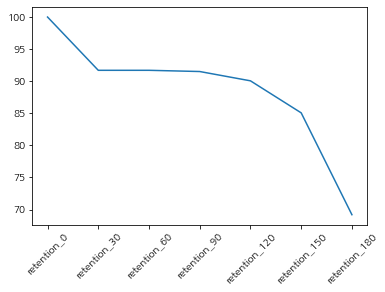

In [118]:
unrolled_retention, rolling_retention_table, rolling_retention_percent = retention(paid_transaction_trend, '2021-01', 30)

In [119]:
(unrolled_retention.mean().to_frame().T*100).round(2)

retention_0  retention_30  retention_60  retention_90  retention_120  \
0        100.0         57.88         68.63         68.46          68.61   

   retention_150  retention_180  
0          70.84           69.2

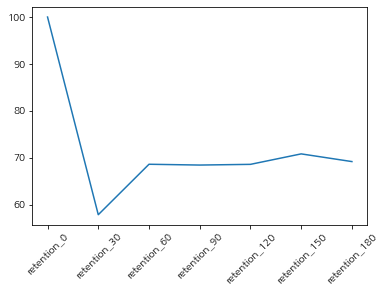

In [120]:
visualize_retention((unrolled_retention.mean().to_frame().T*100).round(2))

In [121]:
(unrolled_retention.mean().to_frame().T*100).round(2)

retention_0  retention_30  retention_60  retention_90  retention_120  \
0        100.0         57.88         68.63         68.46          68.61   

   retention_150  retention_180  
0          70.84           69.2

In [122]:
def retention_nday(transaction:pd.DataFrame, year_month_day:str, n_day:list) : 
    
    # 받아온 테이블에서 필요한 데이터만을 저장한 후 메모리 정리
    transaction_time_by_customer = transaction[['customer_id', 'created_at']]
    del transaction
    
    # 계산 및 비교가능한 날짜 형식으로 변환
    transaction_time_by_customer = transaction_time_by_customer.assign(created_at = transaction_time_by_customer['created_at'].dt.strftime('%Y-%m-%d'))
    transaction_time_by_customer = transaction_time_by_customer.assign(created_at = pd.to_datetime(transaction_time_by_customer['created_at']))
    
    # 받아온 날짜 형변환
    picked_time = datetime.strptime(year_month_day, '%Y-%m-%d')
    
    n_day.insert(0, 0) # n_day리스트 맨 앞에 0 추가
    
    # n_day에 해당하는 날짜 데이터 값을 적재
    retain_period = []
    for n in n_day : 
        retain_period.append(transaction_time_by_customer[(transaction_time_by_customer['created_at']==picked_time+timedelta(days=n))])
    
    # 메모리 정리
    del transaction_time_by_customer
     
    # retain 기간 별로 유저가 방문했는지 여부
    # groupby('customer_id').count로 계산
    retention_group = []
    for i, df in enumerate(retain_period) : 
        retention_group.append(df.groupby('customer_id').count().rename(columns={'created_at':f'retention_{n_day[i]}'}))
    
    # 리텐션 테이블 생성
    retention = pd.concat(retention_group, axis=1)
    retention = retention[~retention['retention_0'].isnull()] # retention_0값이 비어있는 경우 삭제
    retention = retention.fillna(0) # 그 외 null값은 0으로 채움
    retention = retention.astype(int)
    retention[retention>1] = 1
        
    retention_percent = (retention.mean().to_frame().T*100).round(2)
    
    print('retention_table')
    display(retention)
    print('-----------------------------------------------\nretention_percentage')
    display(retention_percent)
    print('-----------------------------------------------\nretention_curve')
    visualize_retention(retention_percent)
    
    return retention, retention_percent

retention_table


retention_0  retention_30  retention_60  retention_90  \
customer_id                                                          
316                    1             0             0             0   
657                    1             0             0             0   
978                    1             0             0             0   
1238                   1             0             0             0   
1304                   1             0             0             1   
...                  ...           ...           ...           ...   
99347                  1             0             0             0   
99436                  1             0             0             0   
99453                  1             0             0             0   
99763                  1             0             0             0   
99937                  1             0             0             0   

             retention_120  retention_150  retention_180  
customer_id                                               
316                      0              0              0  
657                      1              0              0  
978                      0              0              0  
1238                     0              0              0  
1304                     0              0              1  
...                    ...            ...            ...  
99347                    0              1              0  
99436                    0              0              0  
99453                    0              0              0  
99763                    0              0              0  
99937                    0              0              0  

[482 rows x 7 columns]

-----------------------------------------------
retention_percentage


retention_0  retention_30  retention_60  retention_90  retention_120  \
0        100.0          9.54         15.35          16.6          19.09   

   retention_150  retention_180  
0           9.75          21.58

-----------------------------------------------
retention_curve


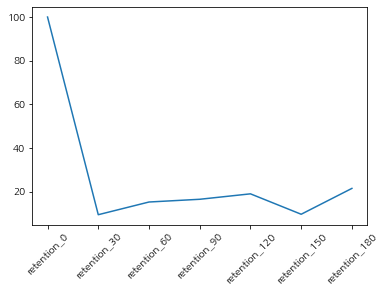

In [123]:
n_day_retention, retention_percent= retention_nday(paid_transaction_trend, '2021-01-01', [30,60,90,120,150,180])

# Promotion

In [124]:
without_promo = transaction_product_customer[transaction_product_customer['promo_code'].isnull()]
with_promo = transaction_product_customer[~transaction_product_customer['promo_code'].isnull()]

## Sucess rate by promo_code

In [126]:
session_group_promo_total = with_promo.groupby('session_id')[['promo_code', 'payment_status']].min()
session_group_promo_total

promo_code payment_status
session_id                                                      
0000649b-9514-4600-979b-42166a798996       SC2022        Success
0000f2fc-1875-4c88-9398-5b7386b14ca6  WEEKENDSERU        Success
0001434a-955b-41a9-80c1-12eed8a07701       AZ2022        Success
00014d8d-9ed6-4d01-9aa9-b4203736f296  WEEKENDSERU        Success
00016d24-4dd8-494f-bc62-4d55d4042b4f       AZ2022        Success
...                                           ...            ...
ffff284a-9364-4296-a758-e3b0b4297f6d       AZ2022        Success
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff       AZ2022        Success
ffffd3d9-79db-459e-a427-388204a7aac7    LIBURDONG        Success
fffff7cf-2a18-4303-9c12-aa836ae3b543       AZ2022        Success
fffffaf6-55ee-428b-a3bf-075cd7f1a093       AZ2022        Success

[326536 rows x 2 columns]

In [127]:
# 각 프로모션별 프로모션 성공률
promo_success = pd.crosstab(session_group_promo_total['promo_code'], session_group_promo_total['payment_status'])
promo_success = promo_success.assign(promo_count=promo_success['Success'] + promo_success['Failed'])
promo_success = promo_success.assign(success_rate=round(promo_success['Success'] / 
                                                        (promo_success['Success'] + promo_success['Failed'])*100, 3))
promo_success.sort_values('promo_count', ascending=False)

# 각 프로모션별로 성공률은 거의 비슷함
# 쿠폰을 2022년에 상당히 많이 뿌림 -> 2022쿠폰이 상당히 많음

payment_status  Failed  Success  promo_count  success_rate
promo_code                                                
AZ2022            3831    85396        89227        95.706
BUYMORE           2806    64029        66835        95.802
WEEKENDSERU       2648    59293        61941        95.725
XX2022            1900    42844        44744        95.754
LIBURDONG          946    20019        20965        95.488
WEEKENDMANTAP      861    19587        20448        95.789
SC2022             470    10801        11271        95.830
STARTUP            475    10630        11105        95.723

In [128]:
with_promo_success = with_promo[with_promo['payment_status']=='Success']
without_promo_success = without_promo[without_promo['payment_status']=='Success']

In [129]:
print('NO 프로모션 구매 총액', without_promo_success.groupby('session_id')['total_amount'].mean().sum().round())
print('프로모션 구매 총액', with_promo_success.groupby('session_id')['total_amount'].mean().sum().round())
print('프로모션 총액', with_promo_success.groupby('session_id')['promo_amount'].mean().sum().round())

NO 프로모션 구매 총액 277764354024.0
프로모션 구매 총액 171232890084.0
프로모션 총액 1666818712.0


In [130]:
print('NO 프로모션 구매 평균', without_promo_success.groupby('session_id')['total_amount'].mean().mean().round())
print('프로모션 구매 평균', with_promo_success.groupby('session_id')['total_amount'].mean().mean().round())
print('프로모션 평균', with_promo_success.groupby('session_id')['promo_amount'].mean().mean().round())

NO 프로모션 구매 평균 551815.0
프로모션 구매 평균 547772.0
프로모션 평균 5332.0


## by promo code

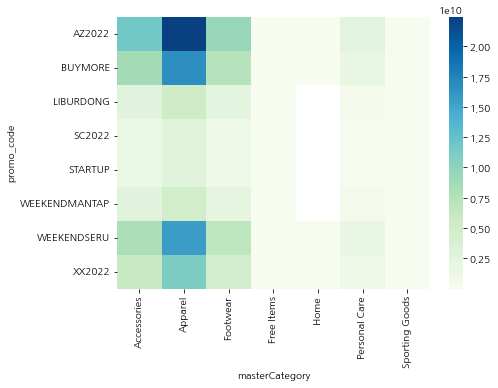

In [131]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(with_promo_success, values='total_item_price', index='promo_code', columns='masterCategory', aggfunc='sum'), cmap='GnBu')
plt.show()

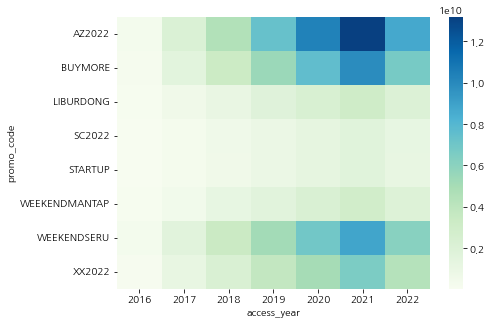

In [132]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(with_promo_success, values='total_item_price', index='promo_code', columns='access_year', aggfunc='sum'), cmap='GnBu')
plt.show()

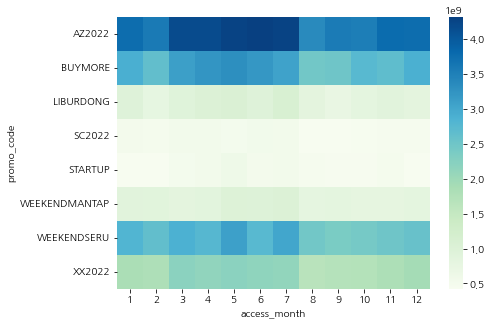

In [133]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(with_promo_success, values='total_item_price', index='promo_code', columns='access_month', aggfunc='sum'), cmap='GnBu')
plt.show()

## promo amount by ~

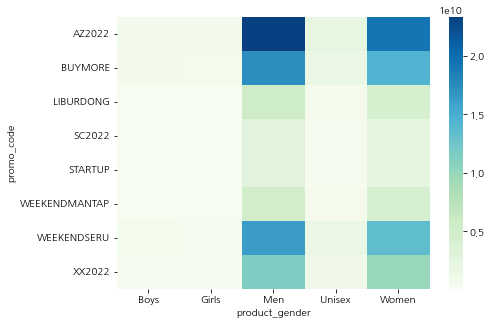

In [134]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(session_group_with_promo, values='product_price', index='promo_code', columns='product_gender', aggfunc='sum'), cmap='GnBu')
plt.show()

In [215]:
session_group_with_promo = with_promo_success.groupby('session_id')[['customer_id', 'access_year', 'access_month', 'access_day', 'access_hour', 
                                                                     'access_day_of_week', 'promo_code', 'total_amount', 'promo_amount', 'shipment_fee']].min()
session_group_with_promo = session_group_with_promo.assign(product_price = session_group_with_promo['total_amount']
                                                           + session_group_with_promo['promo_amount']
                                                           - session_group_with_promo['shipment_fee'])
session_group_with_promo = session_group_with_promo.assign(promotion_ratio = round(session_group_with_promo['promo_amount'] / session_group_with_promo['product_price']*100, 2))
session_group_with_promo

customer_id  access_year  access_month  \
session_id                                                                     
0000649b-9514-4600-979b-42166a798996        16868         2020             7   
0000f2fc-1875-4c88-9398-5b7386b14ca6        93614         2021             8   
0001434a-955b-41a9-80c1-12eed8a07701        54569         2020             9   
00014d8d-9ed6-4d01-9aa9-b4203736f296        12851         2018             4   
00016d24-4dd8-494f-bc62-4d55d4042b4f          729         2019             6   
...                                           ...          ...           ...   
ffff284a-9364-4296-a758-e3b0b4297f6d        36369         2017             3   
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff          544         2021            10   
ffffd3d9-79db-459e-a427-388204a7aac7        15566         2021            11   
fffff7cf-2a18-4303-9c12-aa836ae3b543         2353         2021             2   
fffffaf6-55ee-428b-a3bf-075cd7f1a093        52089         2018             7   

                                      access_day  access_hour  \
session_id                                                      
0000649b-9514-4600-979b-42166a798996          23           14   
0000f2fc-1875-4c88-9398-5b7386b14ca6           1            6   
0001434a-955b-41a9-80c1-12eed8a07701           9           10   
00014d8d-9ed6-4d01-9aa9-b4203736f296          14            6   
00016d24-4dd8-494f-bc62-4d55d4042b4f          19           21   
...                                          ...          ...   
ffff284a-9364-4296-a758-e3b0b4297f6d          29           19   
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff           8           15   
ffffd3d9-79db-459e-a427-388204a7aac7          28            3   
fffff7cf-2a18-4303-9c12-aa836ae3b543          26           16   
fffffaf6-55ee-428b-a3bf-075cd7f1a093          26            8   

                                      access_day_of_week   promo_code  \
session_id                                                              
0000649b-9514-4600-979b-42166a798996                   3       SC2022   
0000f2fc-1875-4c88-9398-5b7386b14ca6                   6  WEEKENDSERU   
0001434a-955b-41a9-80c1-12eed8a07701                   2       AZ2022   
00014d8d-9ed6-4d01-9aa9-b4203736f296                   5  WEEKENDSERU   
00016d24-4dd8-494f-bc62-4d55d4042b4f                   2       AZ2022   
...                                                  ...          ...   
ffff284a-9364-4296-a758-e3b0b4297f6d                   2       AZ2022   
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff                   4       AZ2022   
ffffd3d9-79db-459e-a427-388204a7aac7                   6    LIBURDONG   
fffff7cf-2a18-4303-9c12-aa836ae3b543                   4       AZ2022   
fffffaf6-55ee-428b-a3bf-075cd7f1a093                   3       AZ2022   

                                      total_amount  promo_amount  \
session_id                                                         
0000649b-9514-4600-979b-42166a798996         70859         10288   
0000f2fc-1875-4c88-9398-5b7386b14ca6        522429          2365   
0001434a-955b-41a9-80c1-12eed8a07701        254783          5045   
00014d8d-9ed6-4d01-9aa9-b4203736f296        422182          8316   
00016d24-4dd8-494f-bc62-4d55d4042b4f       1937031          4326   
...                                            ...           ...   
ffff284a-9364-4296-a758-e3b0b4297f6d        234927          4218   
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff        477264          3785   
ffffd3d9-79db-459e-a427-388204a7aac7       4429048          2221   
fffff7cf-2a18-4303-9c12-aa836ae3b543        366604         10259   
fffffaf6-55ee-428b-a3bf-075cd7f1a093        319372          2652   

                                      shipment_fee  product_price  \
session_id                                                          
0000649b-9514-4600-979b-42166a798996         10000          71147   
0000f2fc-1875-4c88-9398-5b7386b14ca6             0         524794   
0001434a-955b-41a9-80c1-12eed8a07701    

In [136]:
session_group_with_promo.groupby('access_year')['promo_amount'].sum()

access_year
2016     11576363
2017     78222590
2018    163355690
2019    265220736
2020    360845952
2021    470181690
2022    317415691
Name: promo_amount, dtype: int64

In [137]:
session_group_with_promo.groupby('access_month')['promo_amount'].sum()

access_month
1     140805566
2     132047474
3     147092518
4     148076378
5     157044744
6     150544391
7     153414642
8     121189031
9     121751286
10    128399090
11    130536626
12    135916966
Name: promo_amount, dtype: int64

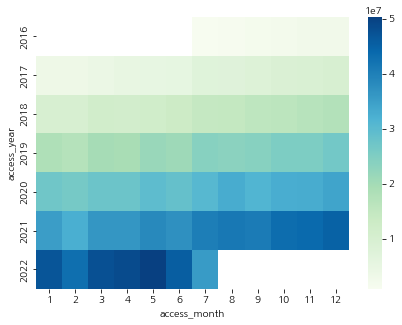

In [138]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(session_group_with_promo, values='promo_amount', index='access_year', columns='access_month', aggfunc='sum'), cmap='GnBu')
plt.show()

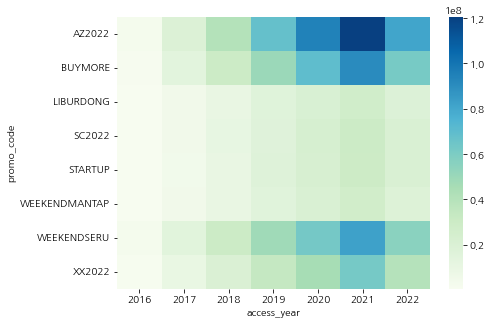

In [139]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(session_group_with_promo, values='promo_amount', index='promo_code', columns='access_year', aggfunc='sum'), cmap='GnBu')
plt.show()

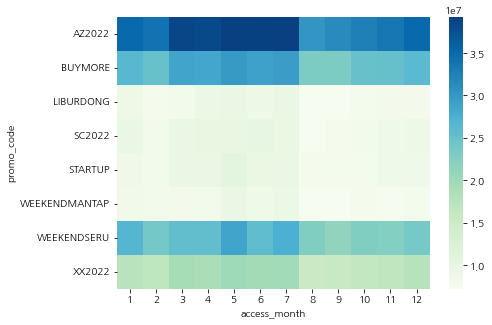

In [140]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(session_group_with_promo, values='promo_amount', index='promo_code', columns='access_month', aggfunc='sum'), cmap='GnBu')
plt.show()

In [141]:
promo_count = session_group_with_promo.groupby('promo_code')['product_price'].count()
promo_amount_mean = session_group_with_promo.groupby('promo_code')['promo_amount'].mean()
promo_amount_sum = session_group_with_promo.groupby('promo_code')['promo_amount'].sum()
promo_amount_ratio = session_group_with_promo.groupby('promo_code')['promotion_ratio'].mean()
product_price_mean = session_group_with_promo.groupby('promo_code')['product_price'].mean()
product_price_sum = session_group_with_promo.groupby('promo_code')['product_price'].sum()
product_price_min = session_group_with_promo.groupby('promo_code')['product_price'].min()
product_price_max = session_group_with_promo.groupby('promo_code')['product_price'].max()

promo_summary = pd.concat([promo_count, promo_amount_sum, promo_amount_mean, promo_amount_ratio], axis=1)
promo_summary.columns = ['promo_count', 'promo_amount_sum', 'promo_amount_mean', 'promo_amount_ratio']
display(promo_summary)

price_summary = pd.concat([product_price_sum, product_price_mean, product_price_min, product_price_max], axis=1)
price_summary.columns = ['product_price_sum', 'product_price_mean', 'product_price_min', 'product_price_max']
display(price_summary)

promo_count  promo_amount_sum  promo_amount_mean  \
promo_code                                                        
AZ2022               85396         425890347        4987.240000   
BUYMORE              64029         319287437        4986.606647   
LIBURDONG            20019         100022741        4996.390479   
SC2022               10801         107563399        9958.651884   
STARTUP              10630         106244532        9994.781938   
WEEKENDMANTAP        19587          97818559        4994.055190   
WEEKENDSERU          59293         296375482        4998.490243   
XX2022               42844         213616215        4985.907362   

               promo_amount_ratio  
promo_code                         
AZ2022                   1.955723  
BUYMORE                  1.958492  
LIBURDONG                1.943286  
SC2022                   3.888023  
STARTUP                  3.912060  
WEEKENDMANTAP            1.953474  
WEEKENDSERU              1.945131  
XX2022                   1.946955

product_price_sum  product_price_mean  product_price_min  \
promo_code                                                                
AZ2022               46473979831       544217.291571              15989   
BUYMORE              34661864074       541346.328601              12402   
LIBURDONG            10997963532       549376.269144              20339   
SC2022                5939498779       549902.673734              27895   
STARTUP               5916508932       556585.976670              29367   
WEEKENDMANTAP        10558044010       539033.236841              23620   
WEEKENDSERU          32249461090       543899.972847              18802   
XX2022               23225098548       542085.205583              15232   

               product_price_max  
promo_code                        
AZ2022                  21702841  
BUYMORE                 16976688  
LIBURDONG               15446400  
SC2022                  15699456  
STARTUP                 17607051  
WEEKENDMANTAP           15681897  
WEEKENDSERU             21702841  
XX2022                  16590367

## by promo_code,  day_of_week, hour pivot(order_count)

In [210]:
week_day_promo = ['AZ2022', 'BUYMORE', 'XX2022', 'SC2022', 'STARTUP']
weekend_promo = ['WEEKENDMANTAP', 'WEEKENDSERU', 'LIBURDONG']

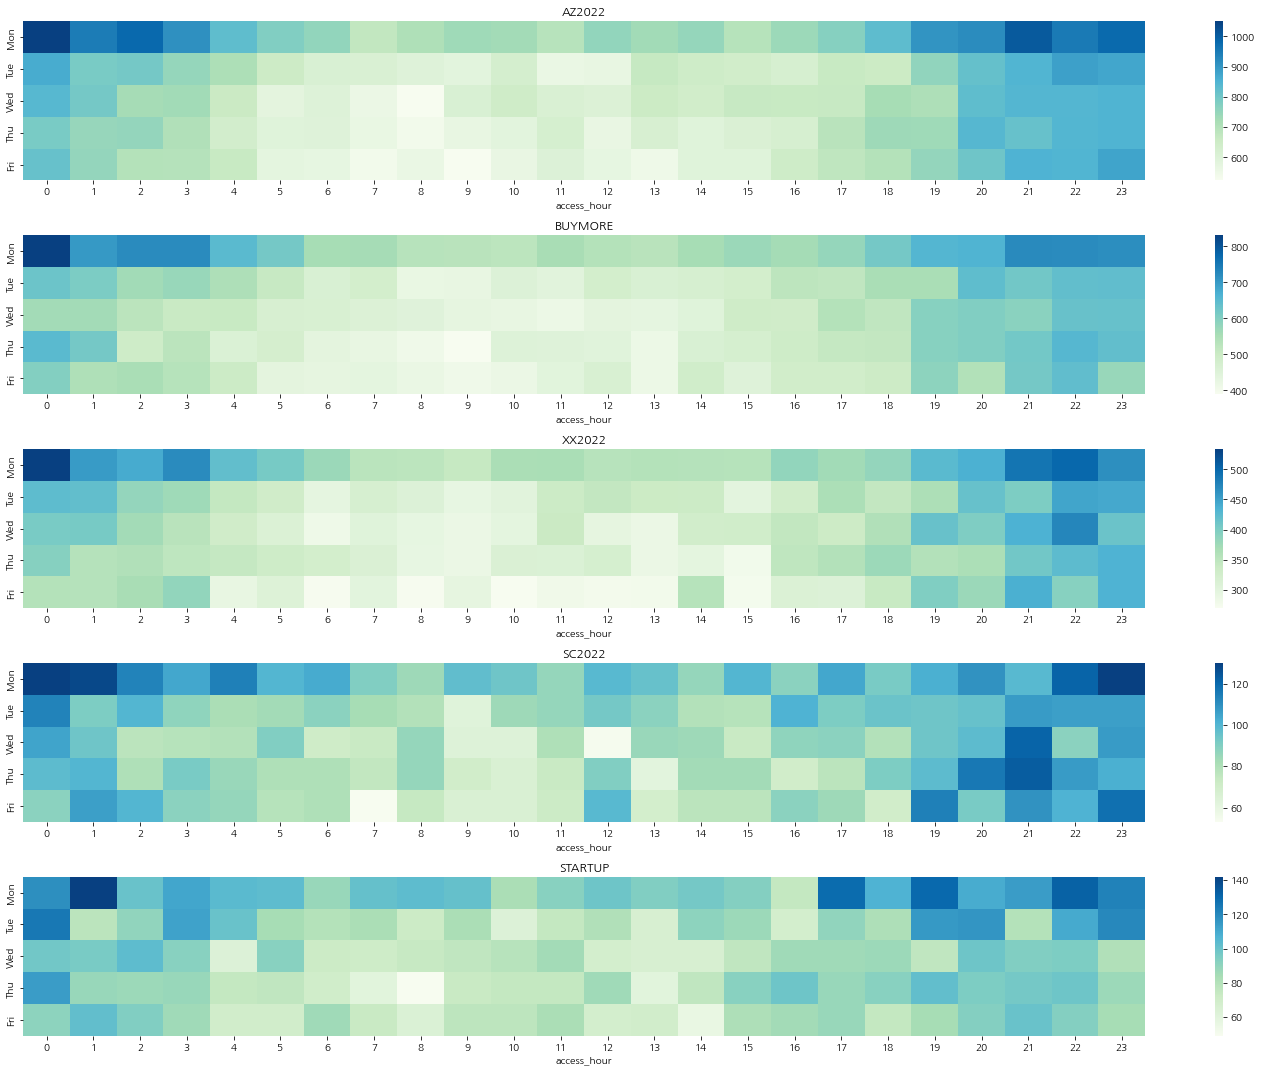

In [208]:
fig, axes = plt.subplots(nrows=5, figsize=(20, 15))
for i, promo in enumerate(week_day_promo) : 
    sns.heatmap(pd.pivot_table(session_group_with_promo[session_group_with_promo['promo_code']==promo], 
                               index = 'access_day_of_week', columns='access_hour',
                               values = 'total_amount',aggfunc = 'count').set_index(pd.Series(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])), cmap='GnBu', ax=axes[i])
    axes[i].set_title(promo)

fig.tight_layout()
plt.show()

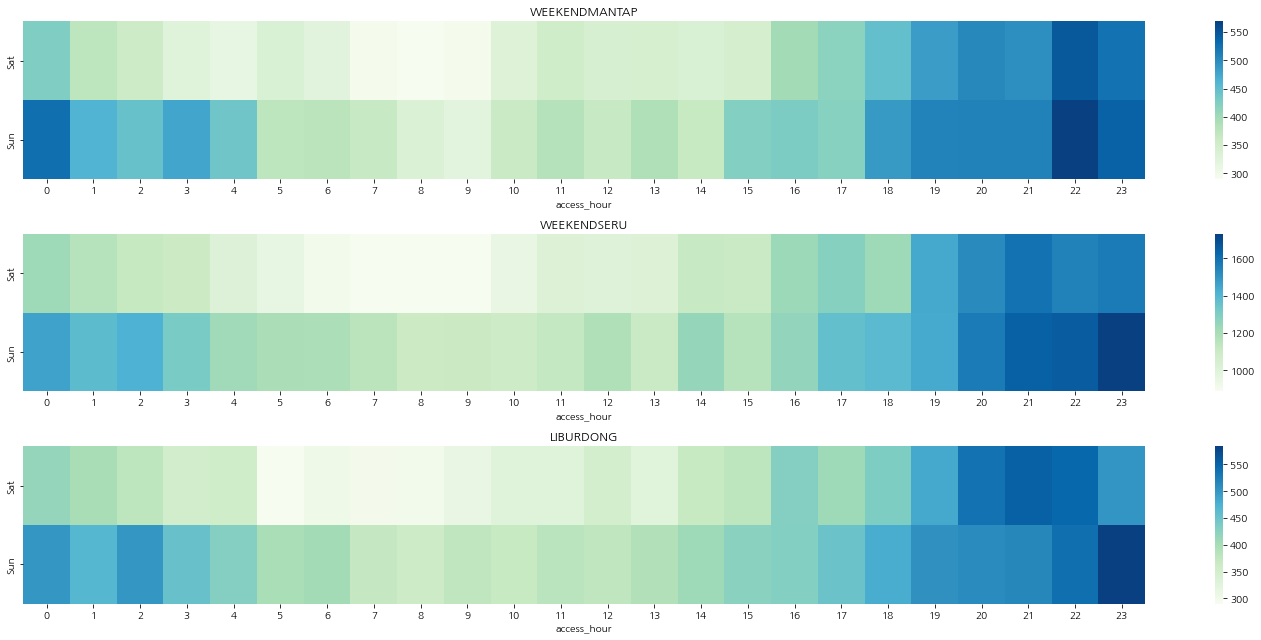

In [209]:
fig, axes = plt.subplots(nrows=3, figsize=(20, 9))
for i, promo in enumerate(weekend_promo) : 
    sns.heatmap(pd.pivot_table(session_group_with_promo[session_group_with_promo['promo_code']==promo], 
                               index = 'access_day_of_week', columns='access_hour',
                               values = 'total_amount',aggfunc = 'count').set_index(pd.Series(['Sat', 'Sun'])), cmap='GnBu', ax=axes[i])
    axes[i].set_title(promo)

fig.tight_layout()
plt.show()